<div class="alert alert-block alert-info alert">

# <span style=" color:red">WELCOME!
    
<div class="alert alert-warning alert-info">
<span style=" color:red"> Bike Sharing Project
</span>

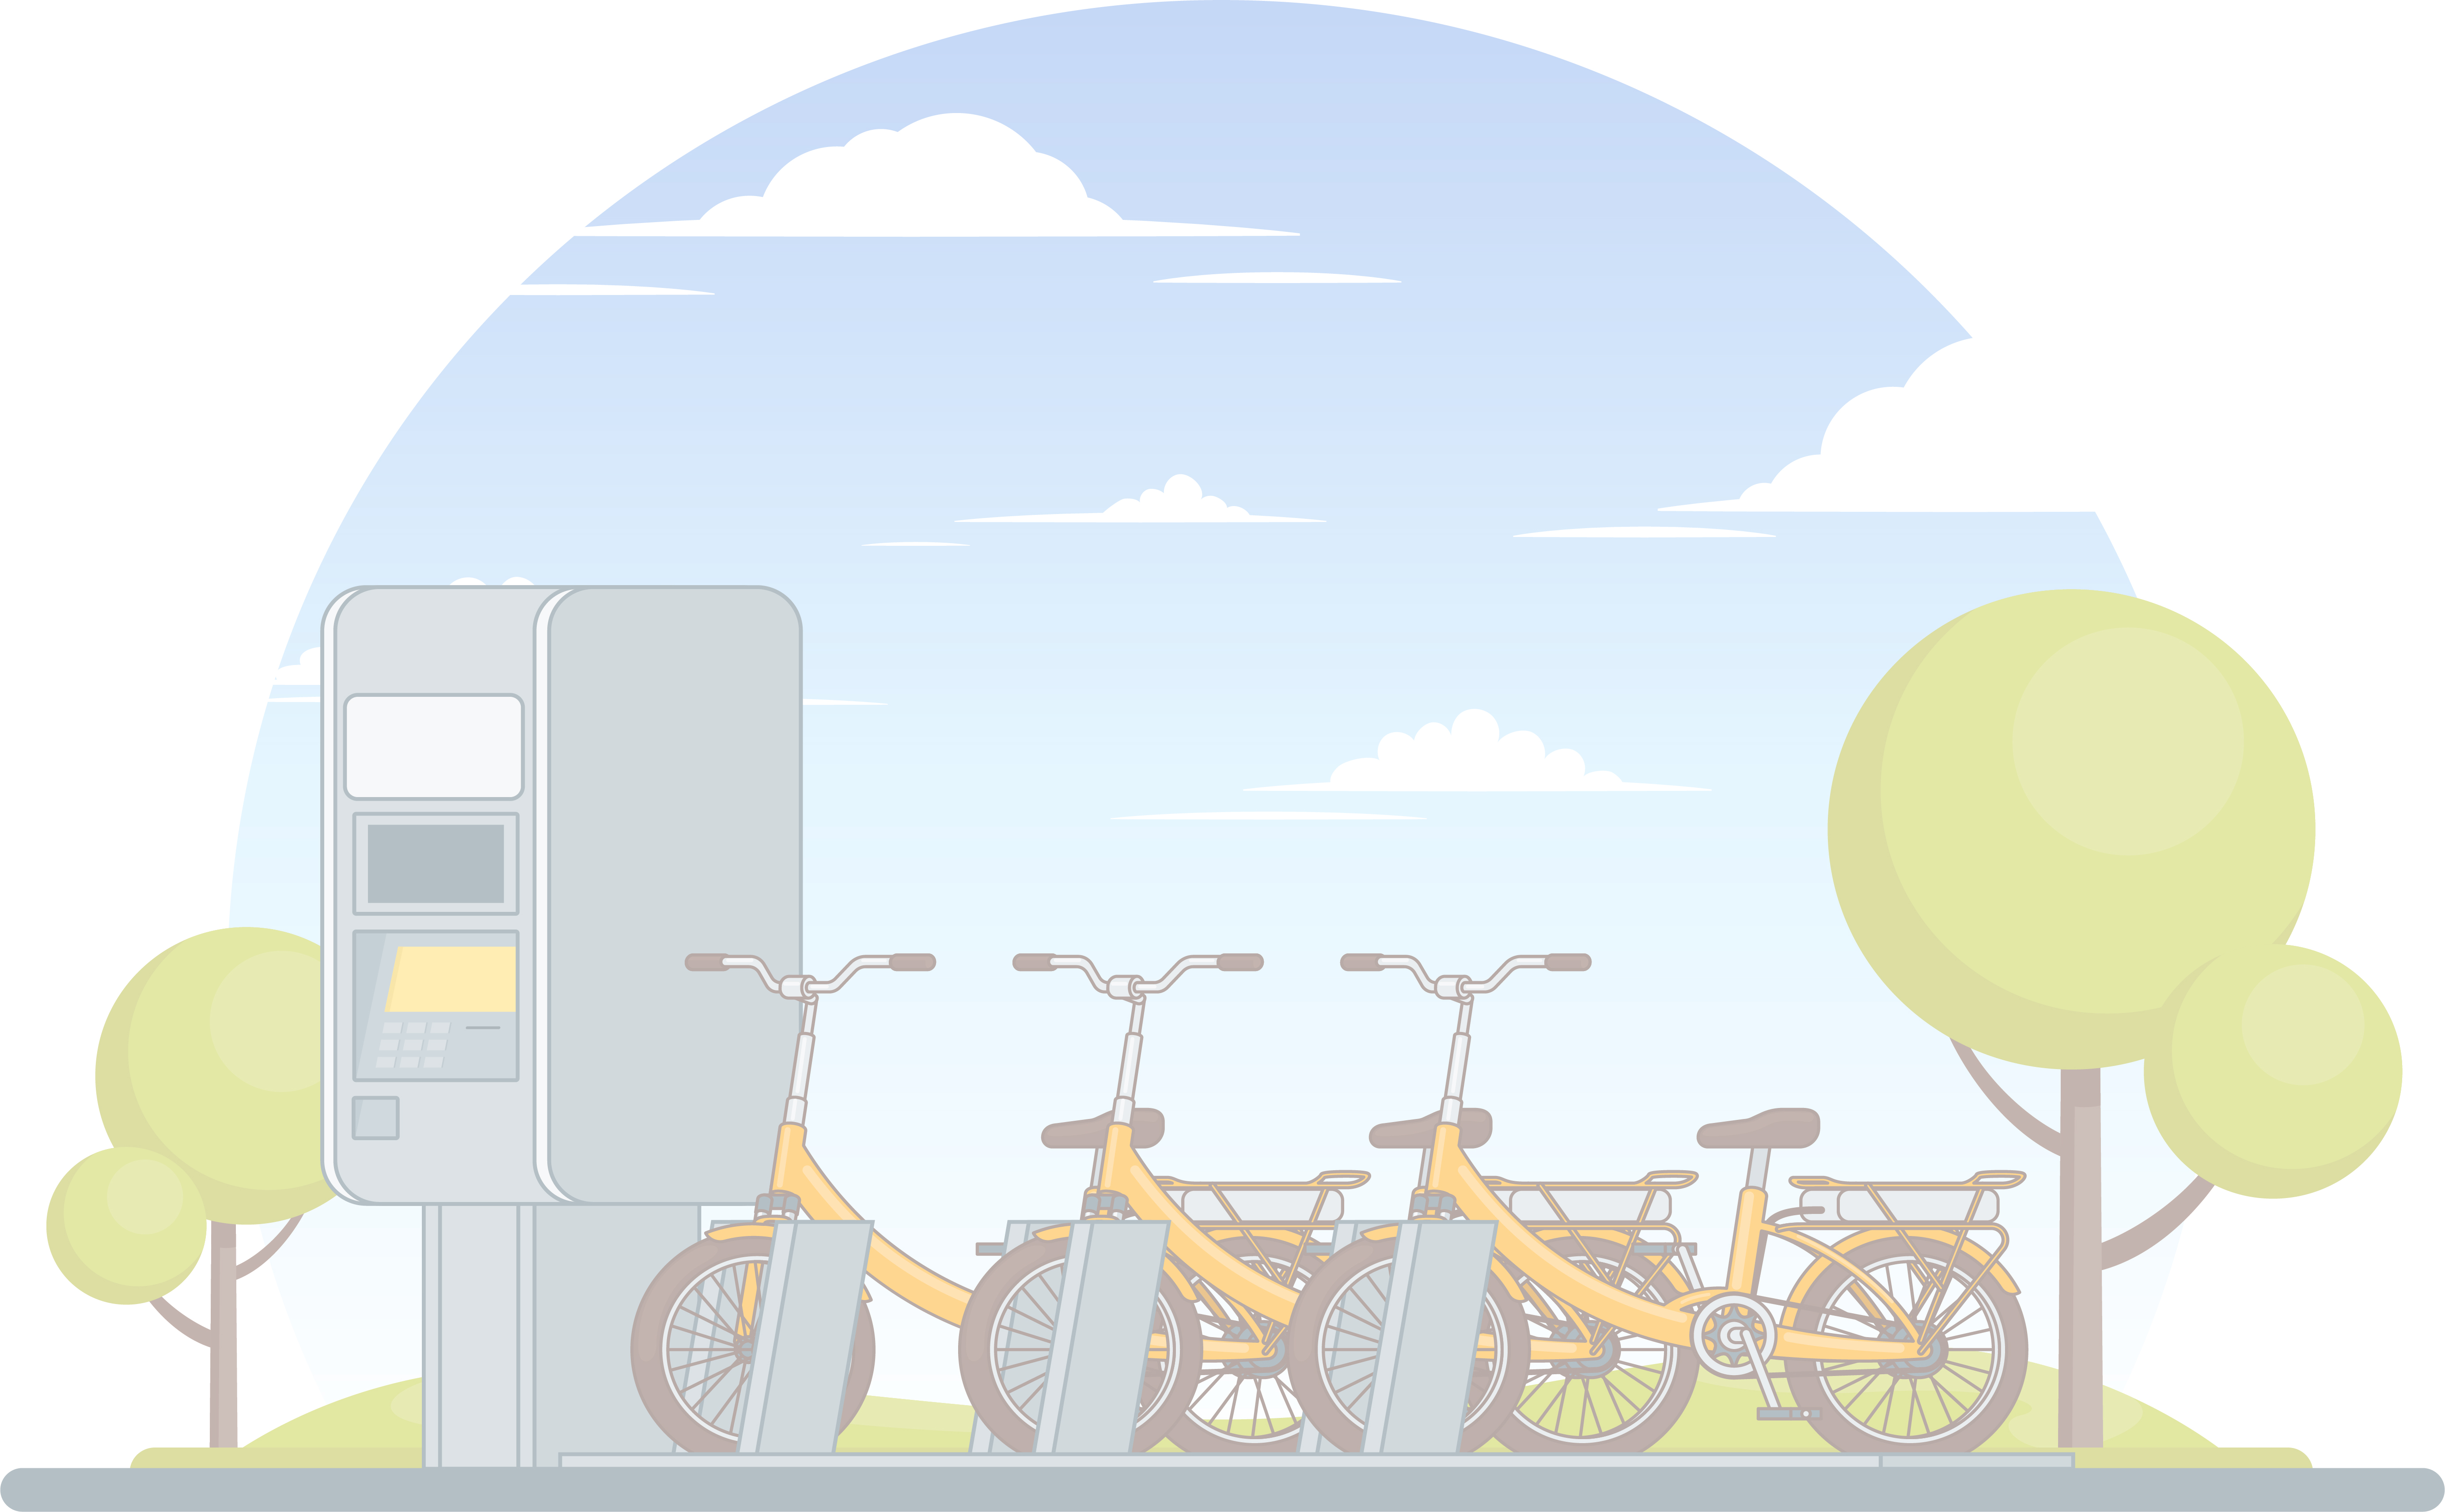

<div class="alert alert-block alert-info alert">

# <span style=" color:red">Import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import plotly.express as px
import folium
from folium import plugins
# from matplotlib.widgets import Slider

# %matplotlib inline
# %matplotlib notebook
plt.rcParams["figure.figsize"] = (6,4)
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")
from sklearn.preprocessing import MultiLabelBinarizer

In [2]:
sns.set_theme(style="whitegrid", palette="pastel")

sns.set(rc={"figure.dpi":100, "figure.figsize":(8,6)})

<div class="alert alert-block alert-info alert">

# <span style=" color:red">Read Data

In [3]:
data = pd.read_csv('store_sharing.csv')
df = data.copy()
df.head()

timestamp  cnt   t1   t2    hum  wind_speed  weather_code  \
0  2015-01-04 00:00:00  182  3.0  2.0   93.0         6.0           3.0   
1  2015-01-04 01:00:00  138  3.0  2.5   93.0         5.0           1.0   
2  2015-01-04 02:00:00  134  2.5  2.5   96.5         0.0           1.0   
3  2015-01-04 03:00:00   72  2.0  2.0  100.0         0.0           1.0   
4  2015-01-04 04:00:00   47  2.0  0.0   93.0         6.5           1.0   

   is_holiday  is_weekend  season  
0         0.0         1.0     3.0  
1         0.0         1.0     3.0  
2         0.0         1.0     3.0  
3         0.0         1.0     3.0  
4         0.0         1.0     3.0

In [4]:
df.shape

(17414, 10)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17414 entries, 0 to 17413
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   timestamp     17414 non-null  object 
 1   cnt           17414 non-null  int64  
 2   t1            17414 non-null  float64
 3   t2            17414 non-null  float64
 4   hum           17414 non-null  float64
 5   wind_speed    17414 non-null  float64
 6   weather_code  17414 non-null  float64
 7   is_holiday    17414 non-null  float64
 8   is_weekend    17414 non-null  float64
 9   season        17414 non-null  float64
dtypes: float64(8), int64(1), object(1)
memory usage: 1.3+ MB


In [6]:
df.columns

Index(['timestamp', 'cnt', 't1', 't2', 'hum', 'wind_speed', 'weather_code',
       'is_holiday', 'is_weekend', 'season'],
      dtype='object')

<div class="alert alert-warning alert-info">
<span style=" color:red">Check missing values and if there are any dublicate rows or not.
</span>

In [7]:
df.isnull().sum()

timestamp       0
cnt             0
t1              0
t2              0
hum             0
wind_speed      0
weather_code    0
is_holiday      0
is_weekend      0
season          0
dtype: int64

In [8]:
df.duplicated().sum()

0

<div class="alert alert-block alert-info alert">

# <span style=" color:red">EDA

<div class="alert alert-warning alert-info">
    
## <span style=" color:red">Plot the distribution of various discrete features on weather, season, holiday and weekend.
</span>

In [4]:
seasons = {
             0.0 : "spring",
             1.0 : "summer",
             2.0 : "fall",
             3.0 : "winter"
            }
df["season"] = df['season'].map(seasons)

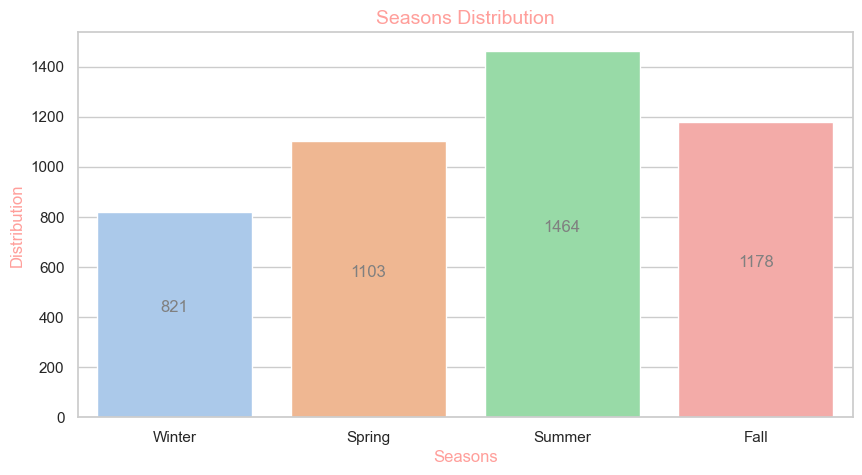

In [42]:
sns.set_theme(style="whitegrid", palette="pastel")
plt.figure(figsize = (10, 5))
ax = sns.barplot(data=df, x="season", y="cnt", palette="pastel", edgecolor="1", ci=None)
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='center', fontsize=12, color='grey', padding=5)
ax.set_title("Seasons Distribution", fontsize=14, color="r")
ax.set_xlabel("Seasons", fontsize=12, color="r")
ax.set_ylabel("Distribution", fontsize=12, color="r");

In [9]:
df.query("weather_code == 94")

Empty DataFrame
Columns: [timestamp, cnt, t1, t2, hum, wind_speed, weather_code, is_holiday, is_weekend, season]
Index: []

In [52]:
weather = {
    1: "clear",
    2: "few clouds",
    3: "broken clouds",
    4: "cloudy",
    7: "rain", 
    10: "rain with thunderstorm", 
    26: "snowfall", 
    94: "freezing fog"
}
df["weather_code"] = df['weather_code'].map(weather)

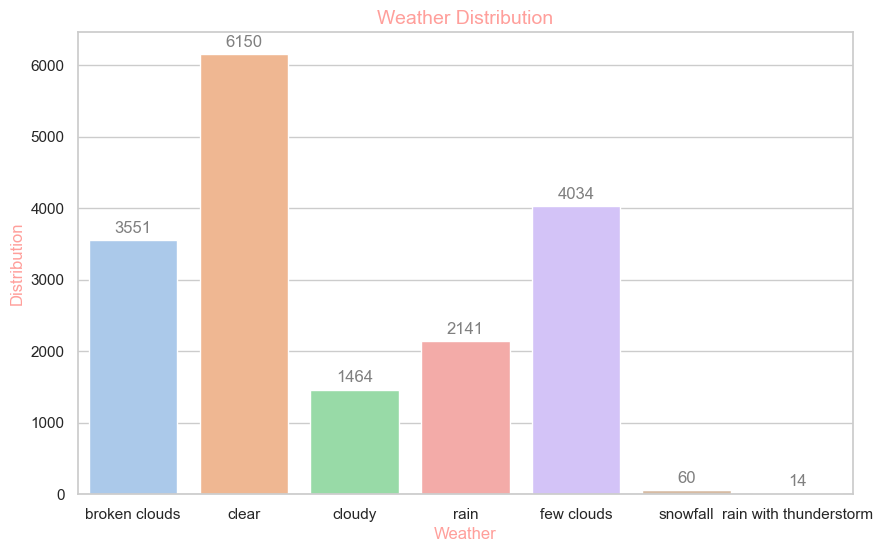

In [93]:
sns.set(style="whitegrid", palette="pastel")
fig, ax = plt.subplots(figsize=(10,6))
ax = sns.countplot(x='weather_code', data=df, palette="pastel")

for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', fontsize=12, color='grey', padding=3)
    
ax.set_title("Weather Distribution", fontsize=14, color="r")
ax.set_xlabel("Weather", fontsize=12, color="r")
ax.set_ylabel("Distribution", fontsize=12, color="r");

In [24]:
holidays = {
             0 : "non-holiday days",
             1 : "holiday"
            }
holidays = df['is_holiday'].map(holidays)
holidays  = holidays.value_counts()
holidays

hx_index = holidays.index

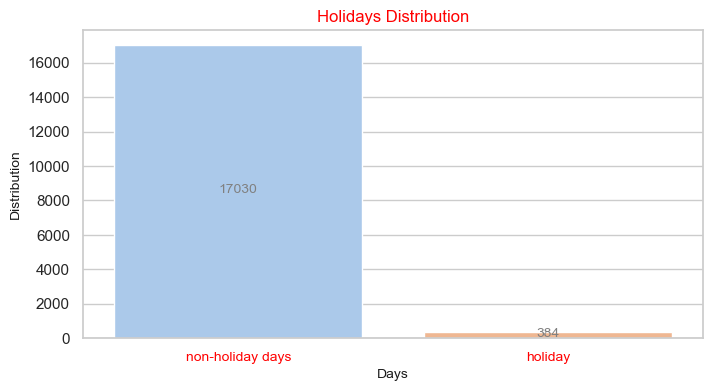

In [25]:
plt.figure(figsize = (8,4))
ax = sns.countplot(x="is_holiday",data=df, order=df["is_holiday"].value_counts().index)

for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='center', fontsize=10, color='grey', padding=1)
    
ax.set_xticklabels(hx_index, color="red", fontsize= 10)
ax.set_title("Holidays Distribution", fontsize=12, color="red")
ax.set_ylabel("Distribution", fontsize=10, color="k")
ax.set_xlabel("Days", fontsize=10, color="k");

In [42]:
df["is_weekend"].value_counts()

0.0    12444
1.0     4970
Name: is_weekend, dtype: int64

In [23]:
weekend = {
             0 : "weekdays",
             1 : "weekends"
            }
week = df['is_weekend'].map(weekend)
week  = week.value_counts()
week

wx_index = week.index

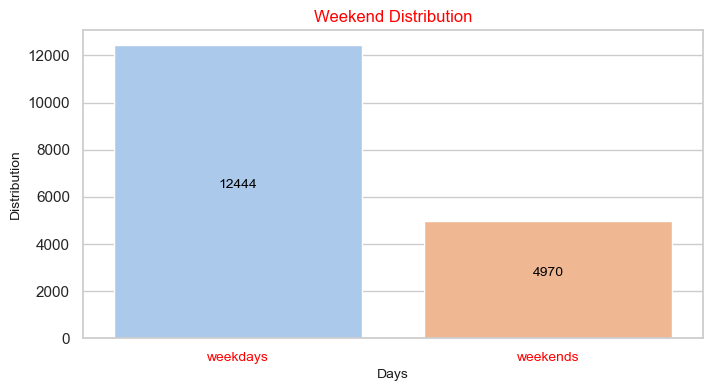

In [24]:
plt.figure(figsize = (8,4))
ax = sns.countplot(x="is_weekend",data=df, order=df["is_weekend"].value_counts().index)

for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='center', fontsize=10, color='black', padding=5)
    
ax.set_xticklabels(wx_index, color="red", fontsize= 10)
ax.set_title("Weekend Distribution", fontsize=12, color="red")
ax.set_ylabel("Distribution", fontsize=10, color="k")
ax.set_xlabel("Days", fontsize=10, color="k");

<div class="alert alert-warning alert-info">
    
## <span style=" color:red">Look at the data type of each variable, transform timestamp in type, and set it as index.
</span>

In [10]:
df.dtypes

timestamp        object
cnt               int64
t1              float64
t2              float64
hum             float64
wind_speed      float64
weather_code    float64
is_holiday      float64
is_weekend      float64
season          float64
dtype: object

In [11]:
df["timestamp"] = pd.to_datetime(df['timestamp']) 
df.set_index('timestamp')

cnt   t1   t2    hum  wind_speed  weather_code  \
timestamp                                                              
2015-01-04 00:00:00   182  3.0  2.0   93.0         6.0           3.0   
2015-01-04 01:00:00   138  3.0  2.5   93.0         5.0           1.0   
2015-01-04 02:00:00   134  2.5  2.5   96.5         0.0           1.0   
2015-01-04 03:00:00    72  2.0  2.0  100.0         0.0           1.0   
2015-01-04 04:00:00    47  2.0  0.0   93.0         6.5           1.0   
...                   ...  ...  ...    ...         ...           ...   
2017-01-03 19:00:00  1042  5.0  1.0   81.0        19.0           3.0   
2017-01-03 20:00:00   541  5.0  1.0   81.0        21.0           4.0   
2017-01-03 21:00:00   337  5.5  1.5   78.5        24.0           4.0   
2017-01-03 22:00:00   224  5.5  1.5   76.0        23.0           4.0   
2017-01-03 23:00:00   139  5.0  1.0   76.0        22.0           2.0   

                     is_holiday  is_weekend  season  
timestamp                                            
2015-01-04 00:00:00         0.0         1.0     3.0  
2015-01-04 01:00:00         0.0         1.0     3.0  
2015-01-04 02:00:00         0.0         1.0     3.0  
2015-01-04 03:00:00         0.0         1.0     3.0  
2015-01-04 04:00:00         0.0         1.0     3.0  
...                         ...         ...     ...  
2017-01-03 19:00:00         0.0         0.0     3.0  
2017-01-03 20:00:00         0.0         0.0     3.0  
2017-01-03 21:00:00         0.0         0.0     3.0  
2017-01-03 22:00:00         0.0         0.0     3.0  
2017-01-03 23:00:00         0.0         0.0     3.0  

[17414 rows x 9 columns]

<div class="alert alert-warning alert-info">
    
## <span style=" color:red">Make feature engineering. Extract new columns and new insights
</span>

In [56]:
df['year'] = df['timestamp'].dt.year

df['month'] = df['timestamp'].dt.month

df['year_of_month'] = df['year'].astype(str) + '-' + df['month'].astype(str).str.zfill(2)

def get_season_month(month):
    if 3 <= month <= 5:
        return 'Spring'
    elif 6 <= month <= 8:
        return 'Summer'
    elif 9 <= month <= 11:
        return 'Fall'
    else:
        return 'Winter'


df['season'] = df['month'].apply(get_season_month)


df['day_of_month'] = df['timestamp'].dt.day

df['day_of_week'] = df['timestamp'].dt.dayofweek


df['hour'] = df['timestamp'].dt.hour

df['is_day'] = (df['timestamp'].dt.hour >= 6) & (df['timestamp'].dt.hour < 18)
df['is_work_hours'] = (df['timestamp'].dt.hour >= 9) & (df['timestamp'].dt.hour < 17)

In [74]:
day_s = {
    0: "Monday",
    1: "Tuesday ",
    2: "Wednesday",
    3: "Thursday",
    4: "Friday", 
    5: "Saturday", 
    6: "Sunday"
}
df["day_of_week"] = df['day_of_week'].map(day_s)

In [75]:
df.day_of_week.value_counts()

Monday       2508
Sunday       2505
Tuesday      2505
Thursday     2492
Wednesday    2489
Saturday     2465
Friday       2450
Name: day_of_week, dtype: int64

In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17414 entries, 0 to 17413
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   timestamp      17414 non-null  datetime64[ns]
 1   cnt            17414 non-null  int64         
 2   t1             17414 non-null  float64       
 3   t2             17414 non-null  float64       
 4   hum            17414 non-null  float64       
 5   wind_speed     17414 non-null  float64       
 6   weather_code   17414 non-null  object        
 7   is_holiday     17414 non-null  float64       
 8   is_weekend     17414 non-null  float64       
 9   season         17414 non-null  object        
 10  year           17414 non-null  int64         
 11  month          17414 non-null  int64         
 12  year_of_month  17414 non-null  object        
 13  day_of_month   17414 non-null  int64         
 14  day_of_week    17414 non-null  int64         
 15  hour           1741

In [82]:
df.sample(10)

timestamp   cnt    t1    t2   hum  wind_speed  weather_code  \
11576 2016-05-03 05:00:00   109   7.0   5.0  81.0        13.0           1.0   
10191 2016-03-05 20:00:00   385   4.0   0.0  81.0        18.0           2.0   
11618 2016-05-04 23:00:00   158  10.5  10.5  42.5         7.5           1.0   
4990  2015-07-31 13:00:00  1894  20.5  20.5  38.0         8.0           1.0   
245   2015-01-14 06:00:00   560   5.0   1.0  70.0        23.0           3.0   
11380 2016-04-25 01:00:00    69   8.0   5.0  76.0        19.0           3.0   
11289 2016-04-21 06:00:00   694   7.5   5.0  90.0        14.0           1.0   
4541  2015-07-12 16:00:00  2088  22.0  22.0  65.0        29.0           2.0   
2953  2015-05-07 09:00:00  2169  12.5  12.5  69.5        19.5           3.0   
11443 2016-04-27 16:00:00  1774  10.5   9.5  34.5        14.0           7.0   

       is_holiday  is_weekend  season  year  month year_of_month  day_of_week  \
11576         0.0         0.0  Spring  2016      5       2016-05            1   
10191         0.0         1.0  Spring  2016      3       2016-03            5   
11618         0.0         0.0  Spring  2016      5       2016-05            2   
4990          0.0         0.0  Summer  2015      7       2015-07            4   
245           0.0         0.0  Winter  2015      1       2015-01            2   
11380         0.0         0.0  Spring  2016      4       2016-04            0   
11289         0.0         0.0  Spring  2016      4       2016-04            3   
4541          0.0         1.0  Summer  2015      7       2015-07            6   
2953          0.0         0.0  Spring  2015      5       2015-05            3   
11443         0.0         0.0  Spring  2016      4       2016-04            2   

       hour  is_day  is_work_hours  
11576     5   False          False  
10191    20   False          False  
11618    23   False          False  
4990     13    True           True  
245       6    True          False  
11380     1   False          False  
11289     6    True          False  
4541     16    True           True  
2953      9    True           True  
11443    16    True           True

<div class="alert alert-warning alert-info">
    
## <span style=" color:red">Visualize the correlation with a heatmap
</span>

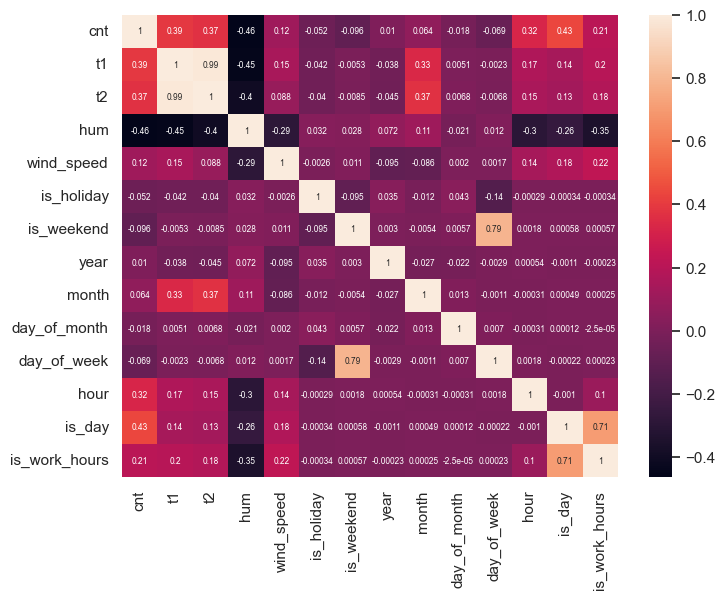

In [15]:
sns.heatmap(df.corr(), annot=True,annot_kws={"size": 6});

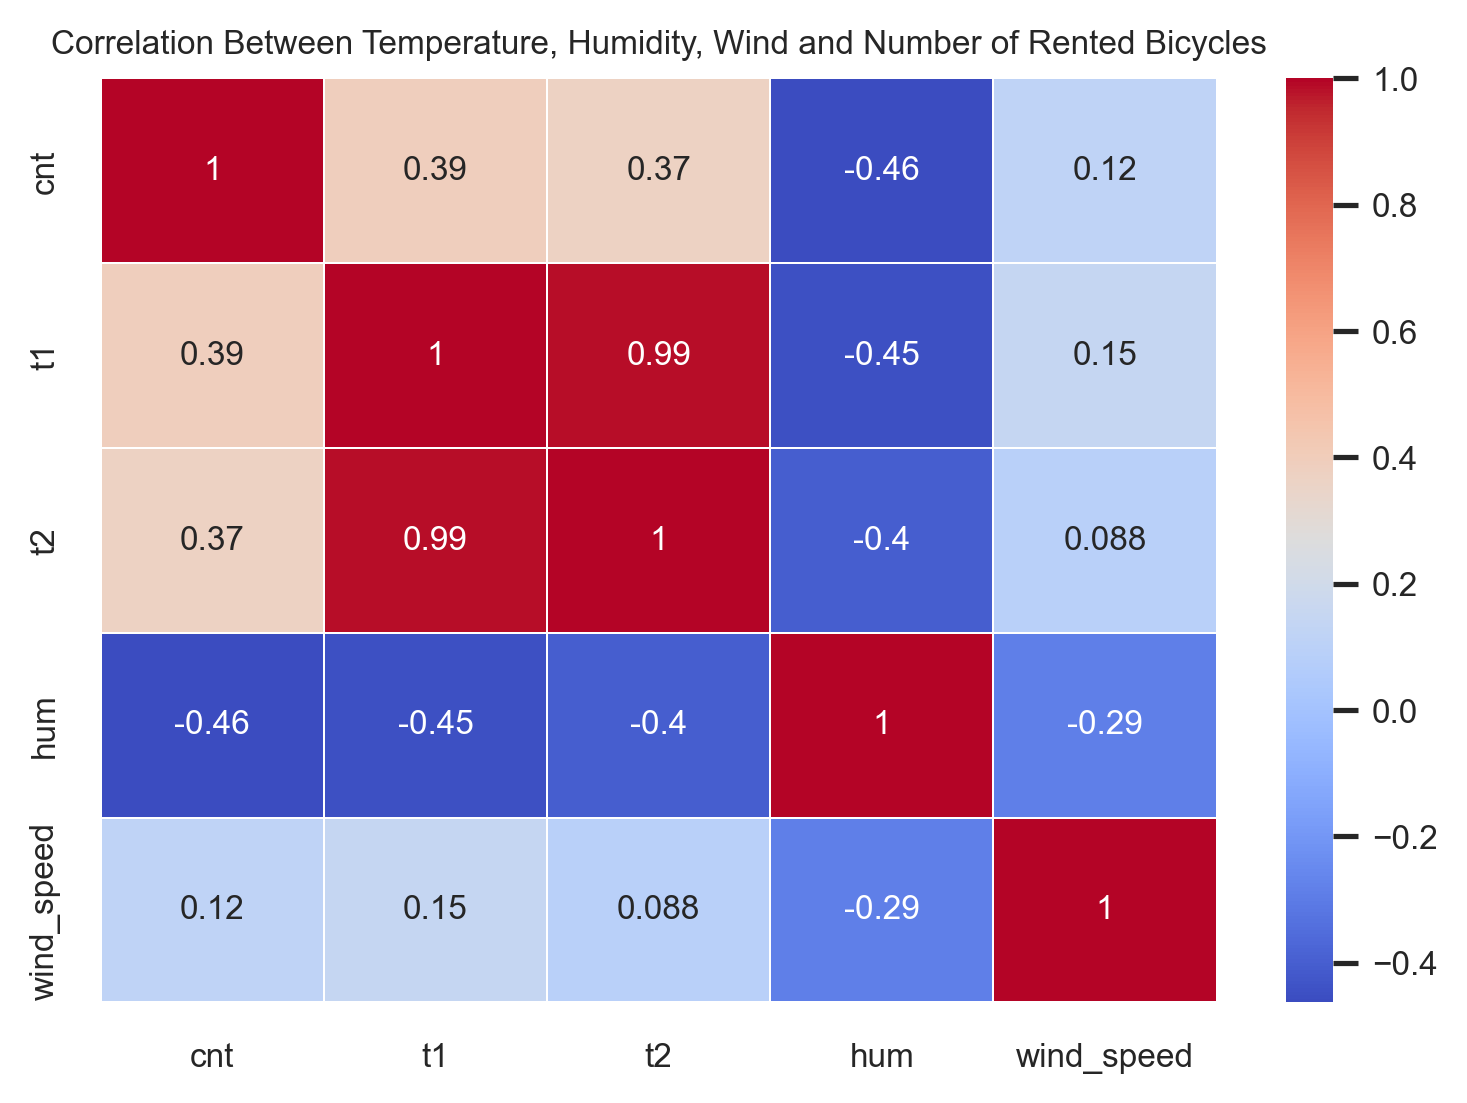

In [110]:
plt.figure(figsize = (6,4))
corr_columns = ['cnt', 't1', 't2', 'hum', 'wind_speed']
subset_df = df[corr_columns]
correlation_matrix = subset_df.corr()
ax = sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.1, annot_kws={"size": 8})
cbar = ax.collections[0].colorbar
cbar.ax.tick_params(labelsize=8)
plt.title('Correlation Between Temperature, Humidity, Wind and Number of Rented Bicycles',fontsize=8)
ax.set_xticklabels(ax.get_xticklabels(), fontsize=8)
ax.set_yticklabels(ax.get_yticklabels(), fontsize=8)
plt.show()

<div class="alert alert-warning alert-info">
    
## <span style=" color:red">Visualize the correlation of the target variable and the other features with barplot
</span>

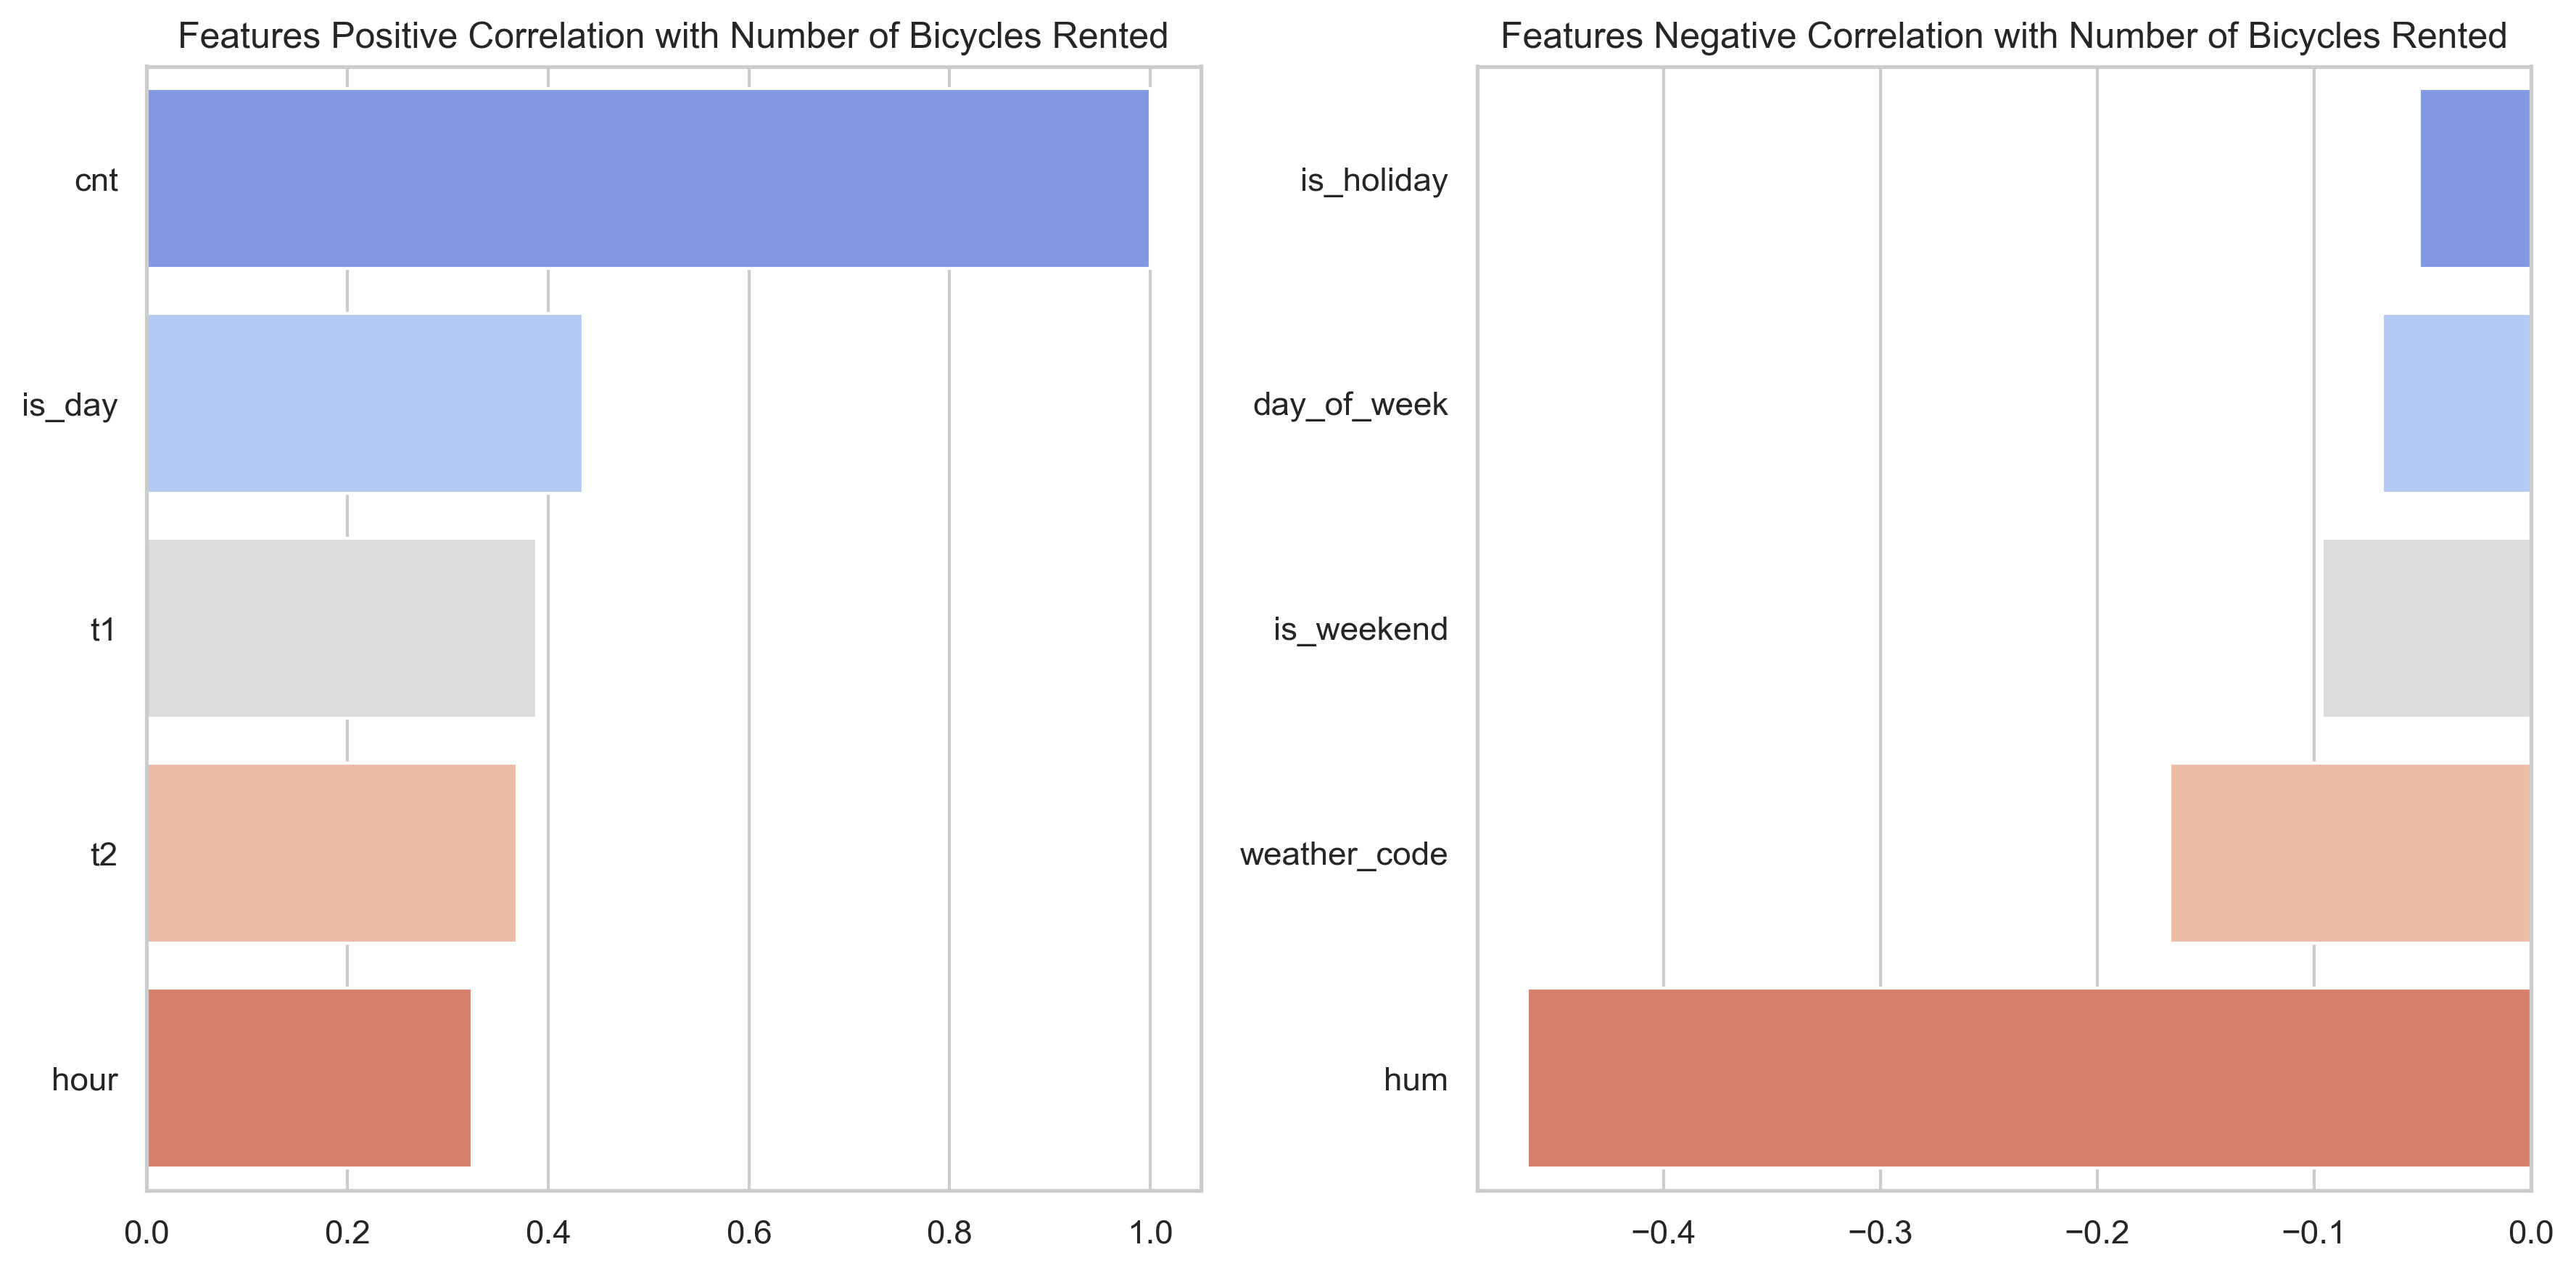

In [116]:

correlation_matrix = df.corr()
correlation_with_cnt = correlation_matrix['cnt'].sort_values(ascending=False)


top_features = correlation_with_cnt.head(5)
bottom_features = correlation_with_cnt.tail(5)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.barplot(x=top_features.values, y=top_features.index, palette='coolwarm')
plt.title('Features Positive Correlation with Bicycles Rented Counts')

plt.subplot(1, 2, 2)
sns.barplot(x=bottom_features.values, y=bottom_features.index, palette='coolwarm')
plt.title('Features Negative Correlation with of Bicycles Rented Counts')

plt.tight_layout()
plt.show()

<div class="alert alert-warning alert-info">
    
## <span style=" color:red">Visualize Features Positive Correlation with Bicycles Rented Counts
</span>

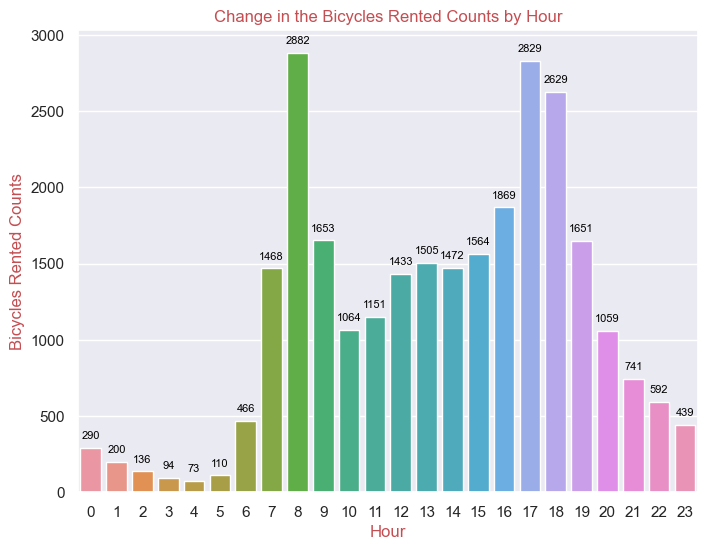

In [18]:
ax = sns.barplot(data=df, x= "hour", y= "cnt", ci=False)

for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', fontsize=8, color='black', padding=5)
    
plt.xlabel("Hour", color= "r")
plt.ylabel("Bicycles Rented Counts", color= "r")
plt.title("Change in the Bicycles Rented Counts by Hour", color= "r")
plt.show(); 

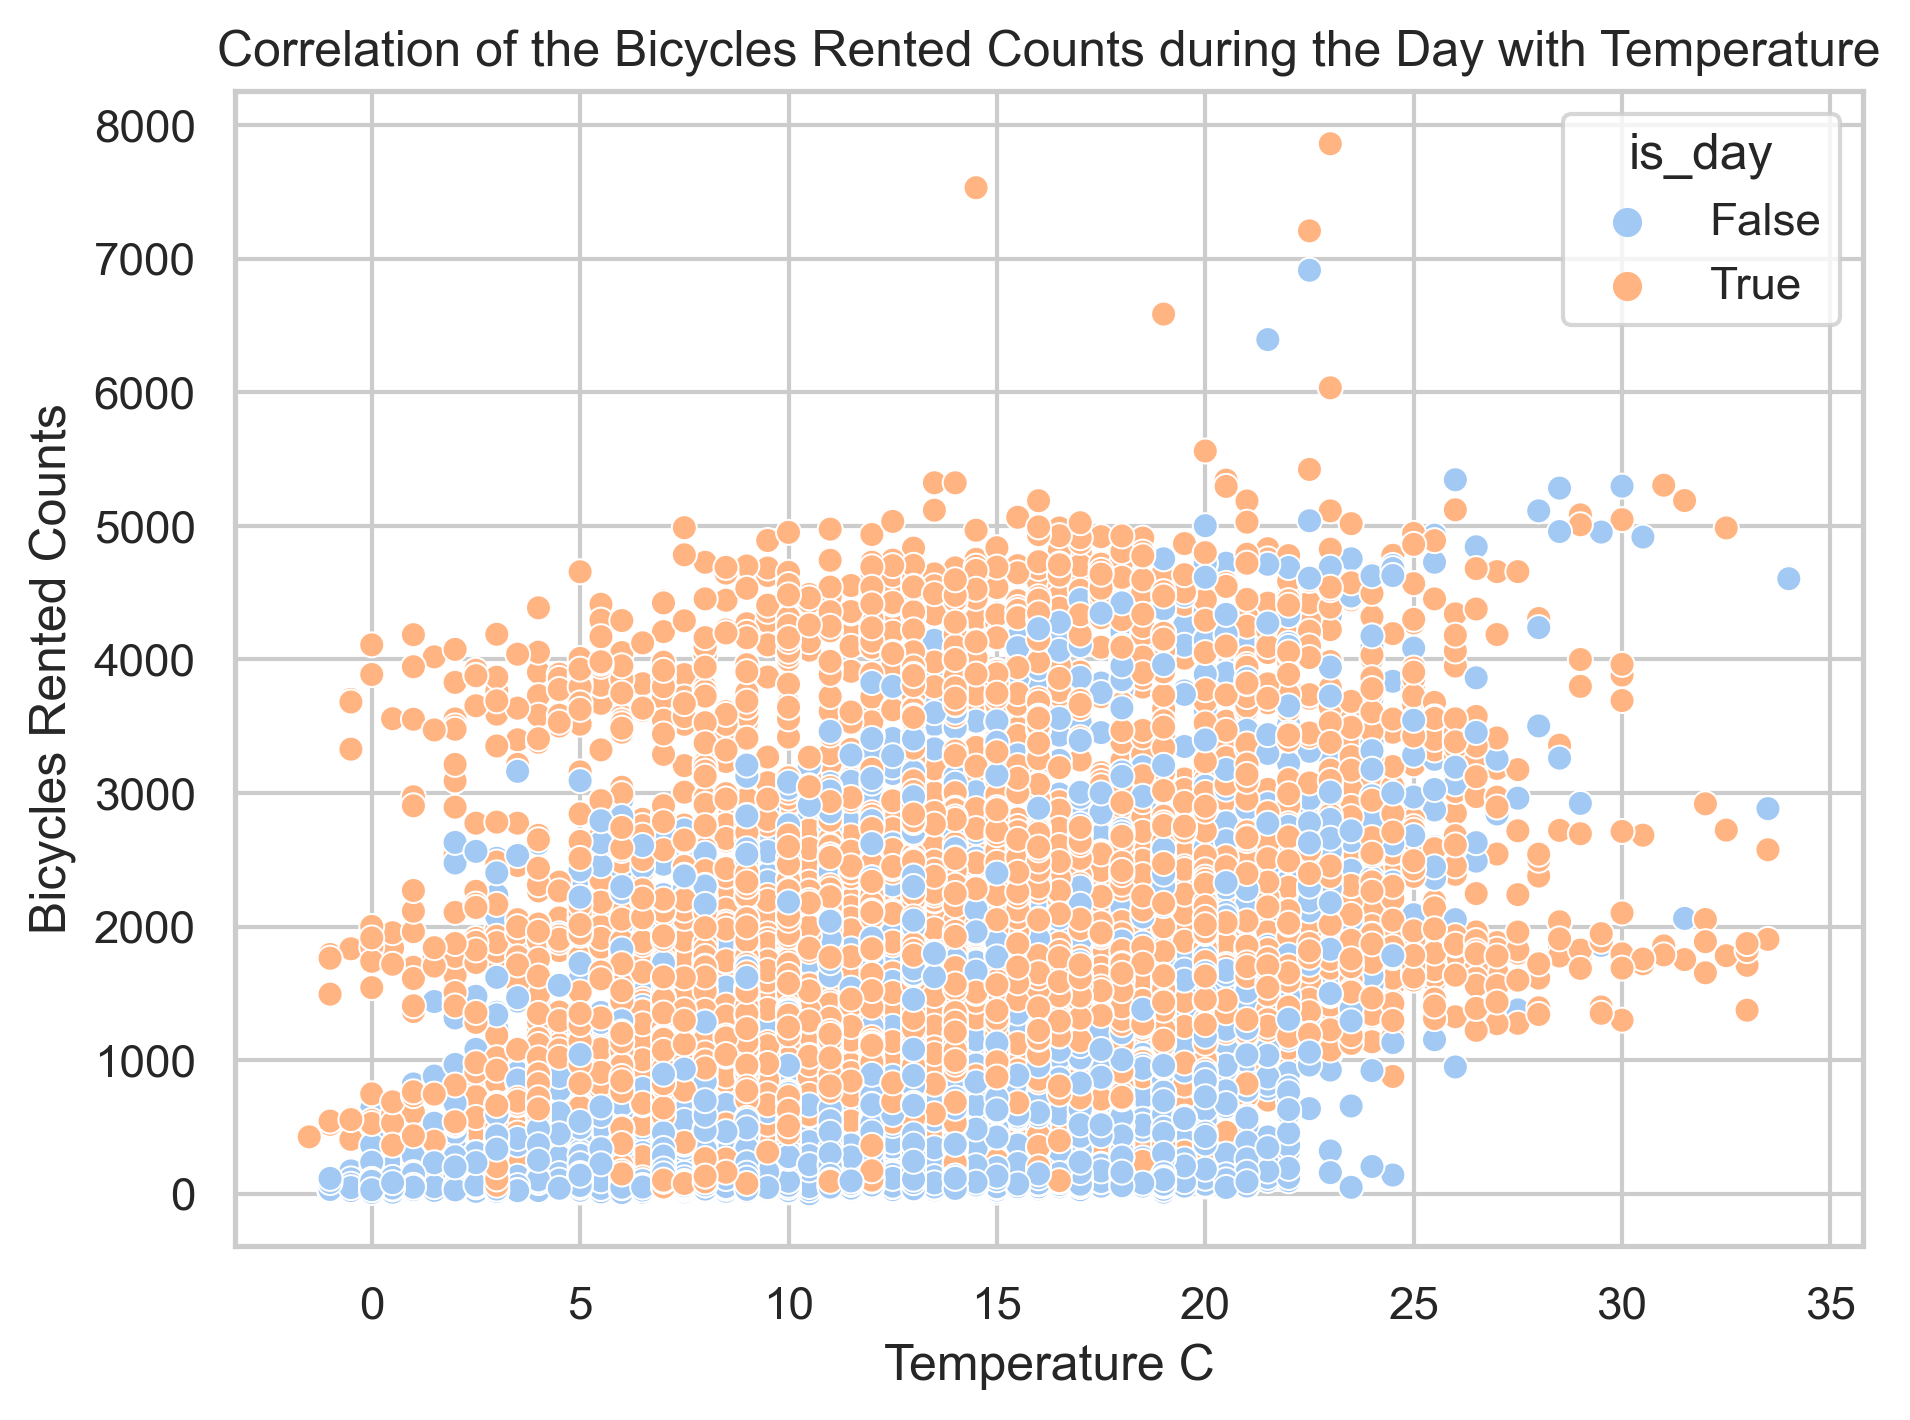

In [119]:
plt.figure(figsize = (7,5))
sns.scatterplot(data=df, x= "t1", y= "cnt", hue="is_day")
plt.xlabel("Temperature C")
plt.ylabel("Bicycles Rented Counts")
plt.title("Correlation of the Bicycles Rented Counts during the Day with Temperature")
plt.show();

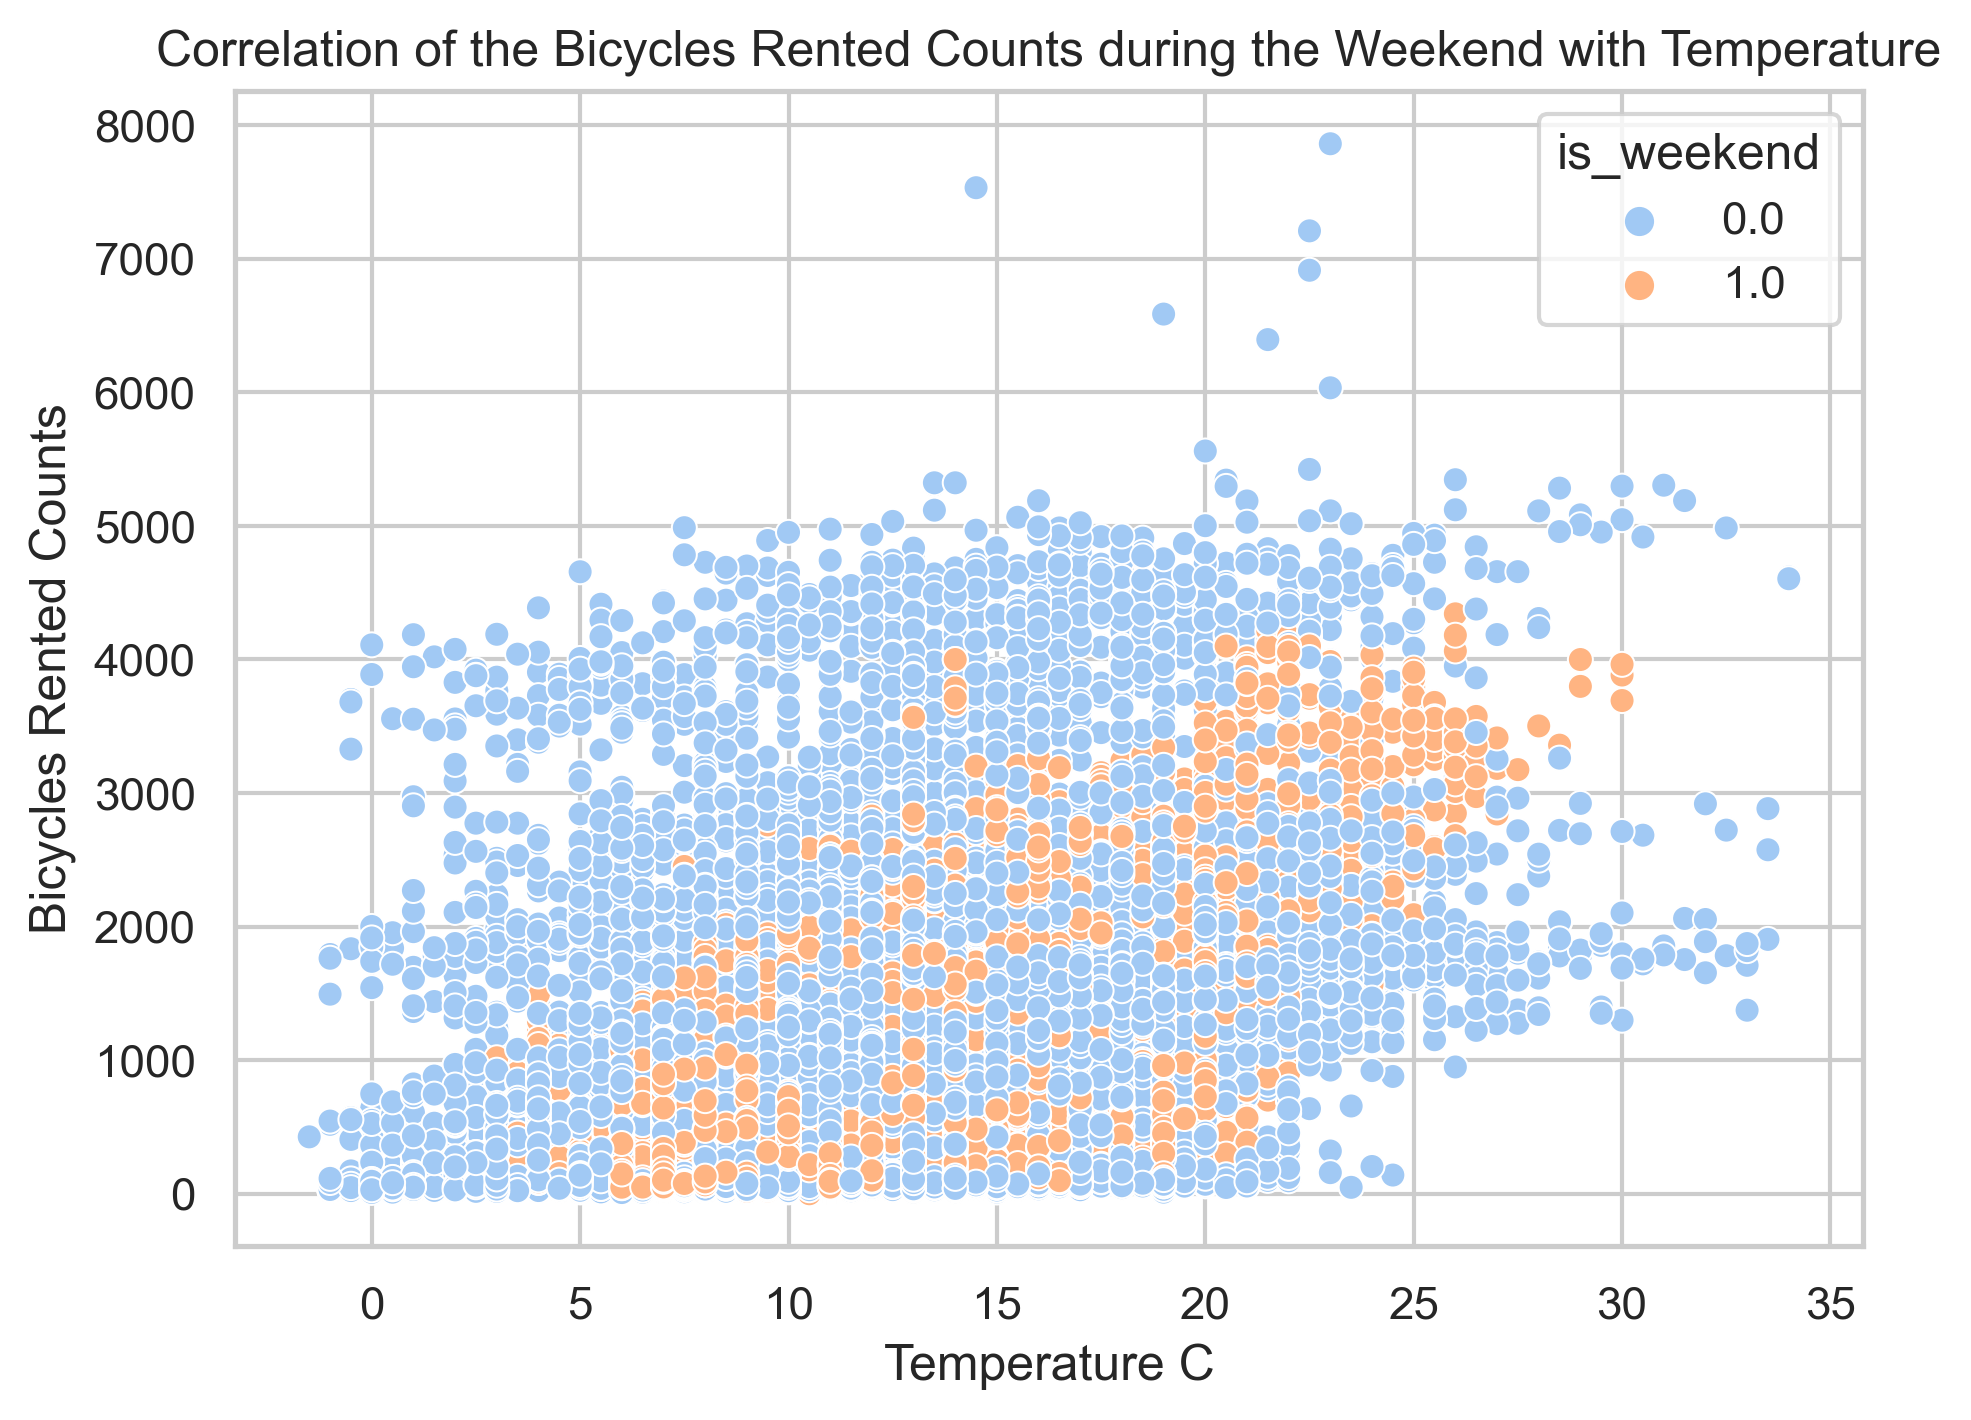

In [120]:
plt.figure(figsize = (7,5))
sns.scatterplot(data=df, x= "t1", y= "cnt", hue="is_weekend")
plt.xlabel("Temperature C")
plt.ylabel("Bicycles Rented Counts")
plt.title("Correlation of the Bicycles Rented Counts during the Weekend with Temperature")
plt.show();

<div class="alert alert-warning alert-info">
    
## <span style=" color:red">Visualize Features Negative/Positive Correlation with Bicycles Rented Counts
</span>

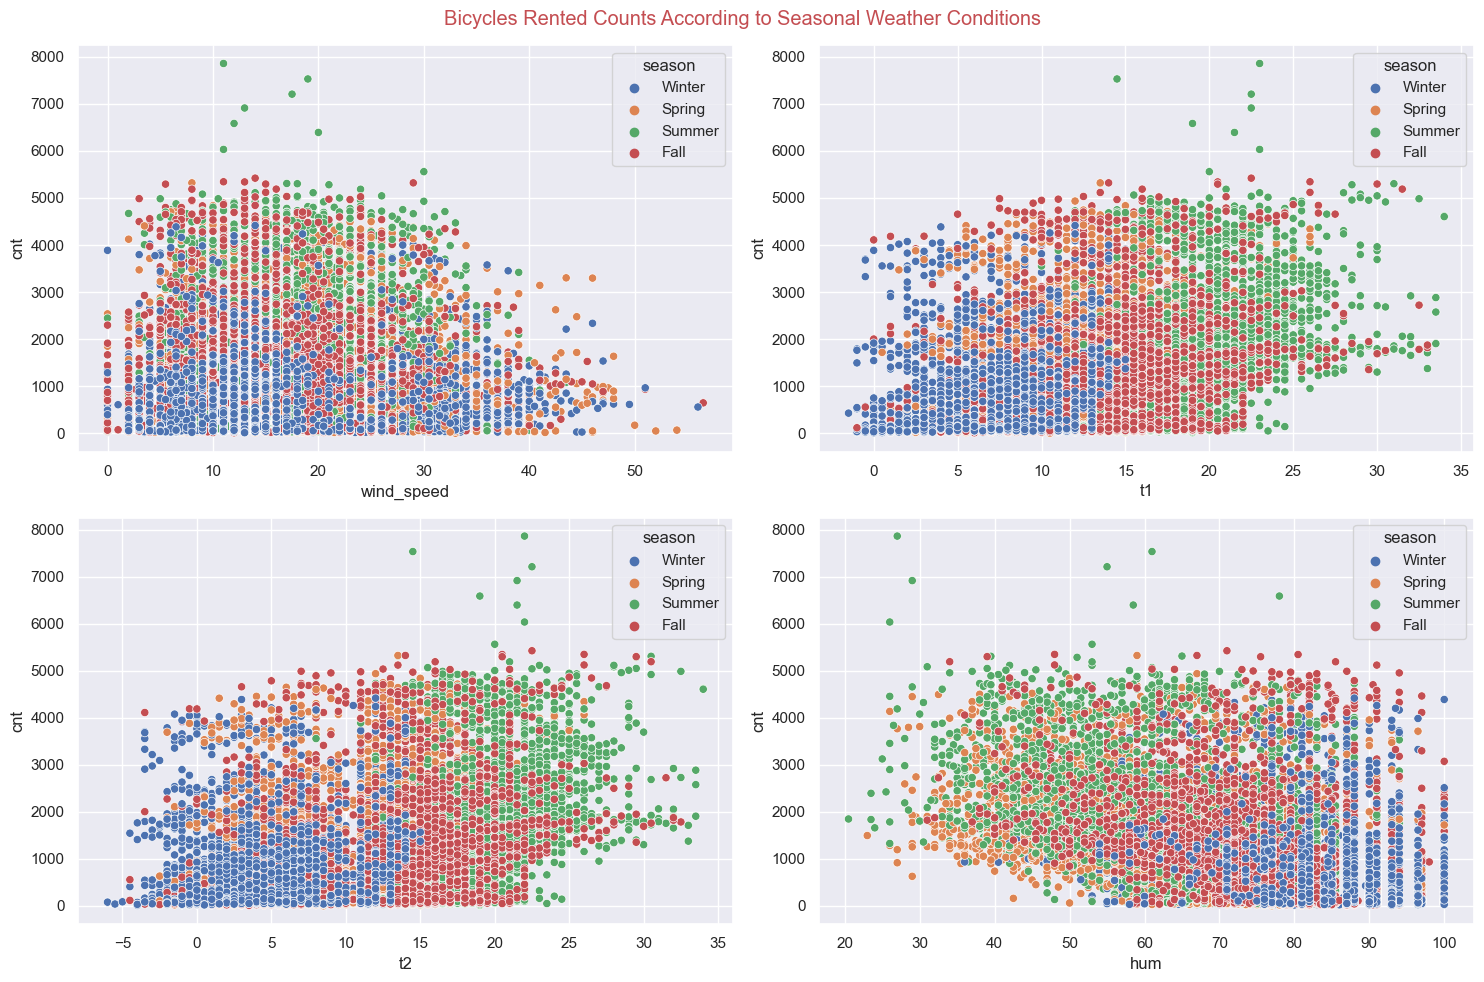

In [23]:
#sns.scatterplot(data=df.query("season == 'Summer'"), x= "hum", y= "cnt"); #, hue="is_weekend"

%matplotlib inline
fig, ax = plt.subplots(2, 2, figsize =  (15, 10))

sns.scatterplot(data = df, x = "wind_speed", y = "cnt", hue="season", ax = ax[0][0]);
sns.scatterplot(data = df, x = "t1", y = "cnt",hue="season" ,ax = ax[0][1]);
sns.scatterplot(data = df, x = "t2", y = "cnt", hue="season",ax = ax[1][0]);
sns.scatterplot(data = df, x = "hum", y = "cnt", hue="season",ax = ax[1][1])
plt.suptitle("Bicycles Rented Counts According to Seasonal Weather Conditions", color="r")
plt.tight_layout();

<div class="alert alert-warning alert-info">
<span style=" color:red">Plot bike shares over time use lineplot.
</span>

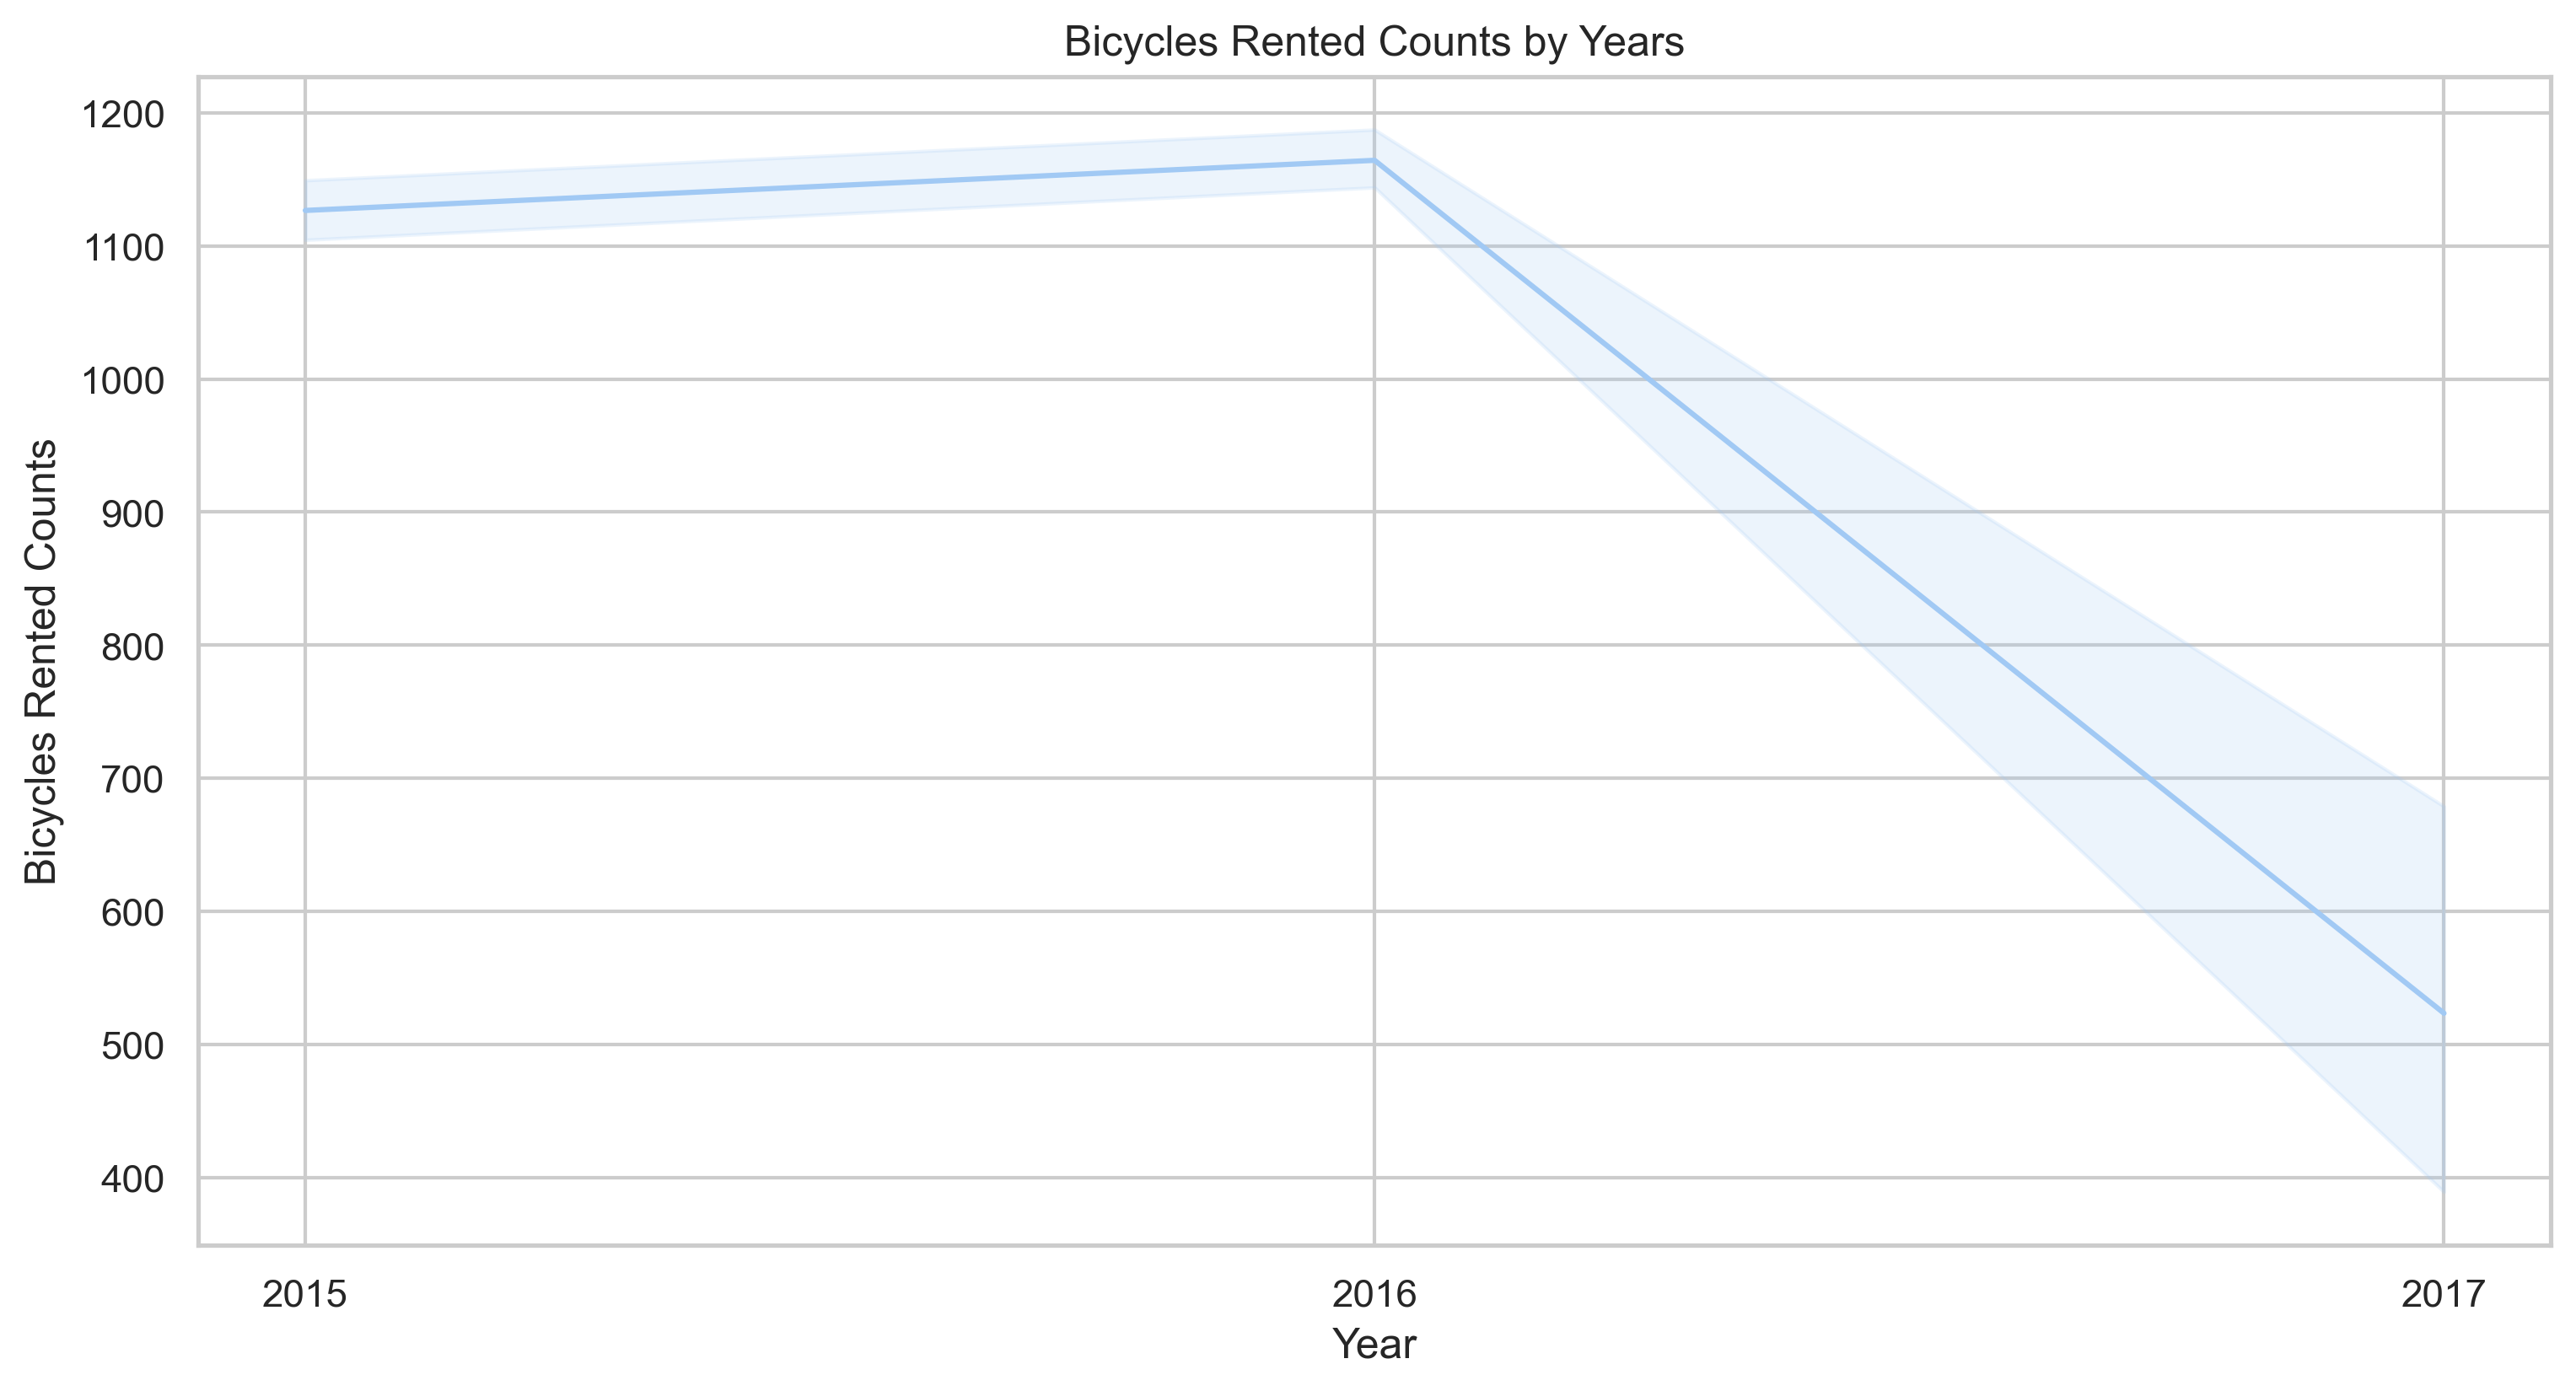

In [175]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='year', y='cnt')

plt.xlabel('Year')
plt.ylabel('Bicycles Rented Counts')
plt.title('Bicycles Rented Counts by Years')
plt.xticks(df['year'].unique())

plt.show()

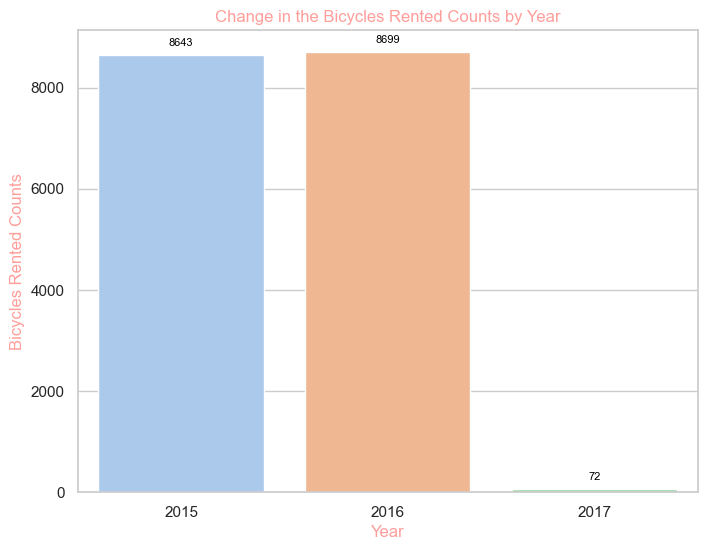

In [32]:
sns.set(style="whitegrid", palette="pastel")
ax = sns.countplot(data=df, x= "year")
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', fontsize=8, color='black', padding=5)
    
plt.xlabel("Year", color= "r")
plt.ylabel("Bicycles Rented Counts", color= "r")
plt.title("Change in the Bicycles Rented Counts by Year", color= "r")
plt.show();

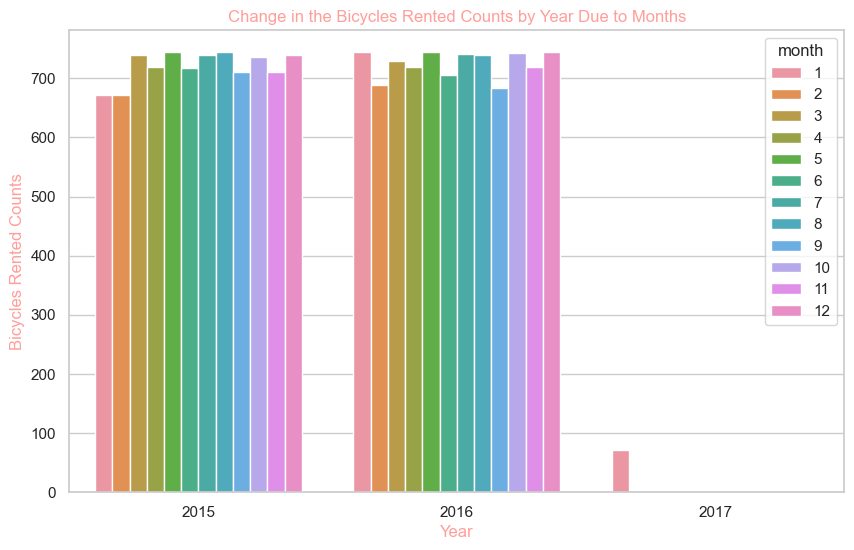

In [65]:
plt.figure(figsize = (10,6))
sns.countplot(data=df, x= "year", hue="month")
plt.xlabel("Year", color= "r")
plt.ylabel("Bicycles Rented Counts", color= "r")
plt.title("Change in the Bicycles Rented Counts by Year Due to Months", color= "r")
plt.show();

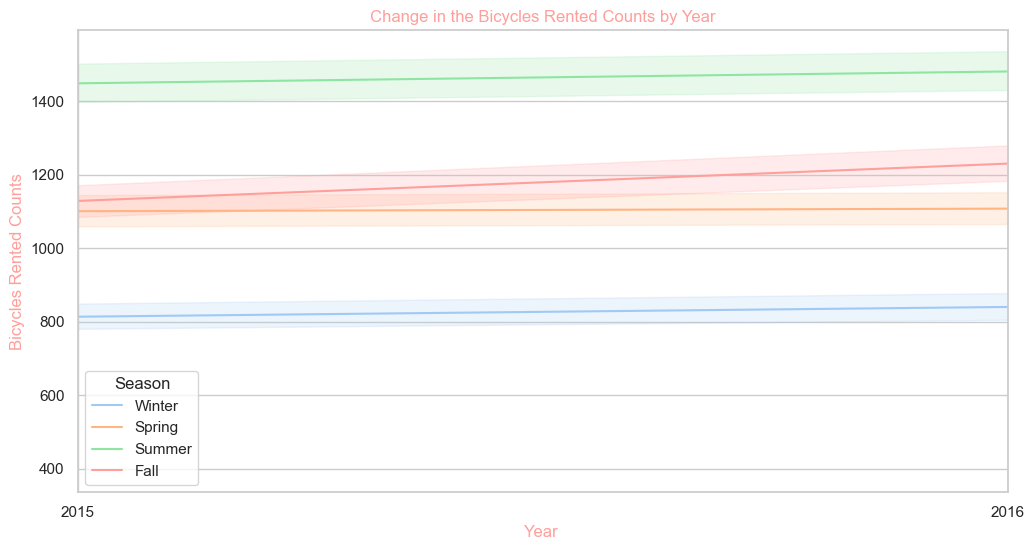

In [43]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='year', y='cnt', hue='season')

plt.xlabel("Year ", color= "r")
plt.ylabel("Bicycles Rented Counts", color= "r")
plt.title("Change in the Bicycles Rented Counts by Year", color= "r")

plt.xticks(df['year'].unique())
plt.legend(title='Season')
plt.xlim(2015, 2016)
plt.show()

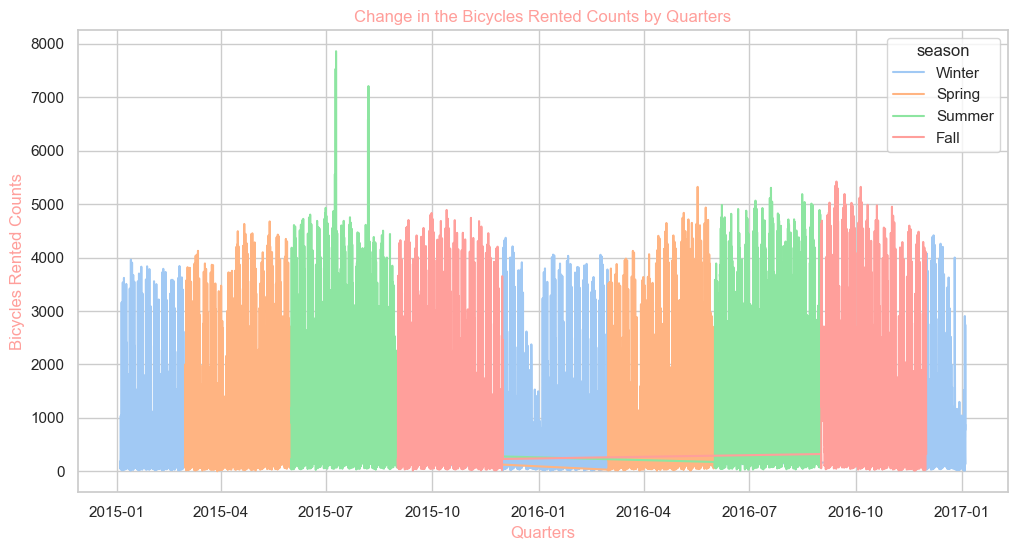

In [66]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='timestamp', y='cnt', hue='season', sort=False)

plt.xlabel('Quarters', color= "r")
plt.ylabel('Bicycles Rented Counts', color= "r")
plt.title("Change in the Bicycles Rented Counts by Quarters", color= "r")
plt.show()

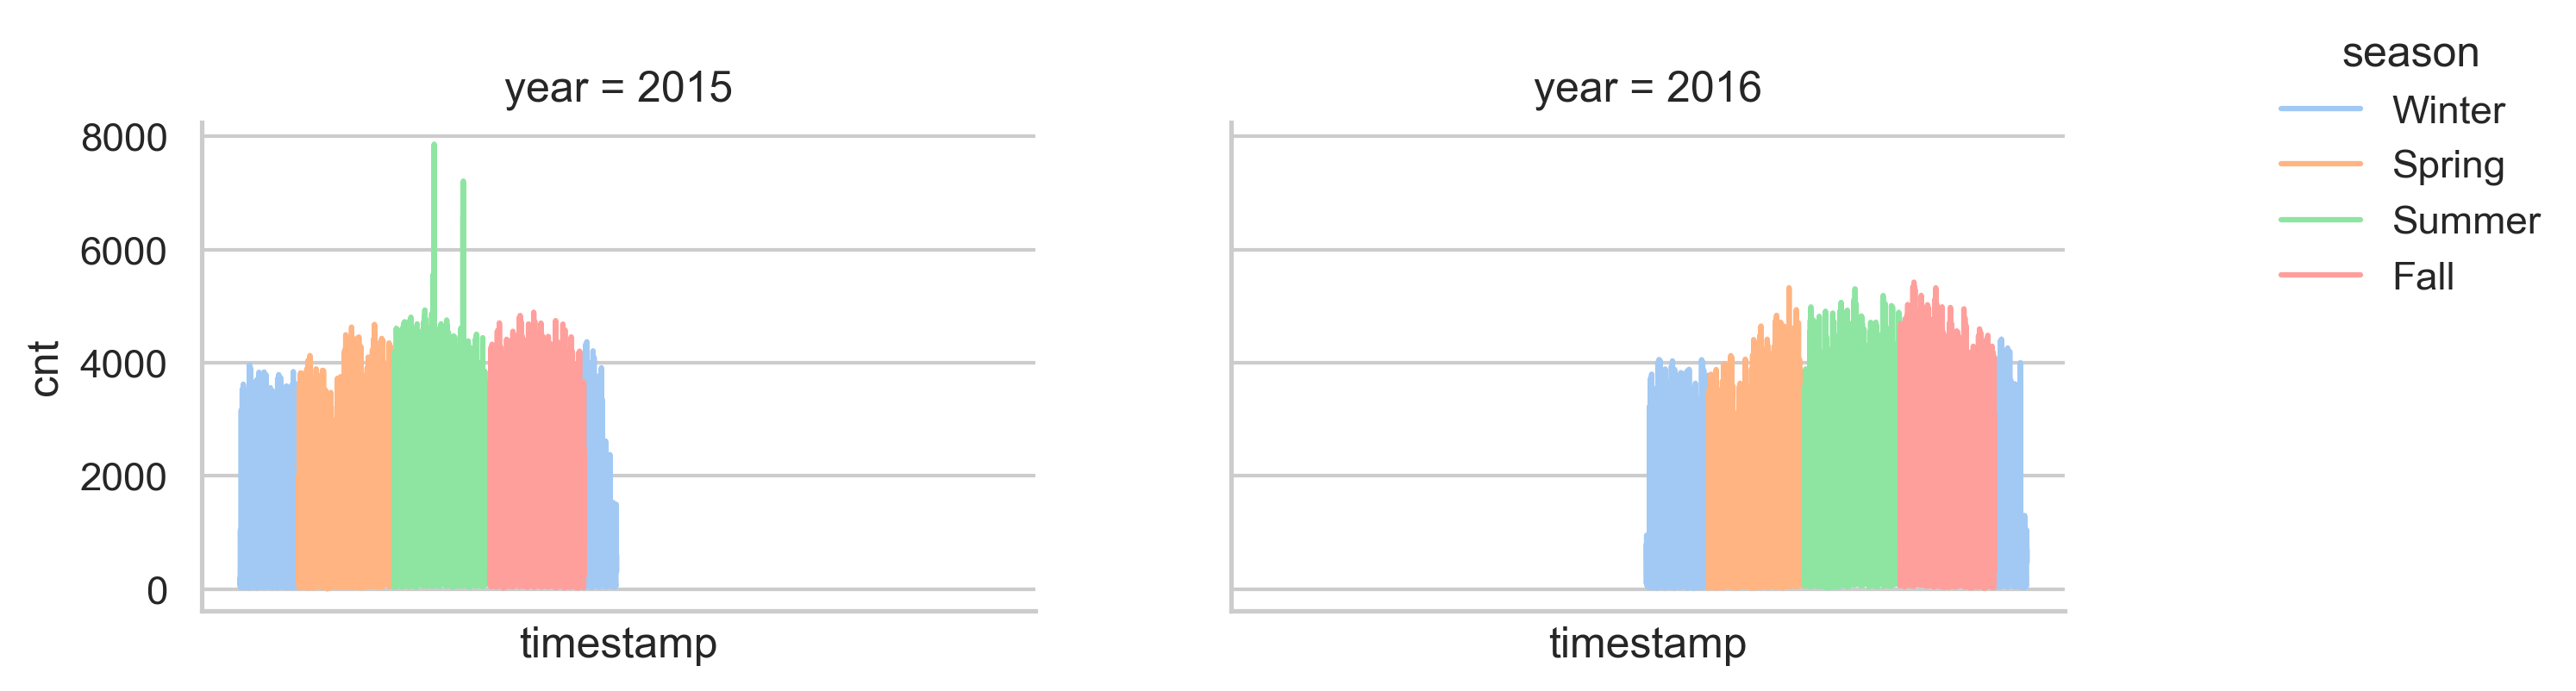

In [182]:
sns.set_theme(style="whitegrid", palette="pastel")
selected_years = [2015, 2016]
selected_df = df[df['year'].isin(selected_years)]
g = sns.FacetGrid(data=selected_df, col='year', hue='season', col_wrap=3)
g.map(sns.lineplot, 'timestamp', 'cnt')
g.add_legend(title='season', loc='upper right')
g.fig.subplots_adjust(top=0.85, right=1.2)
g.set(xticks=[]);

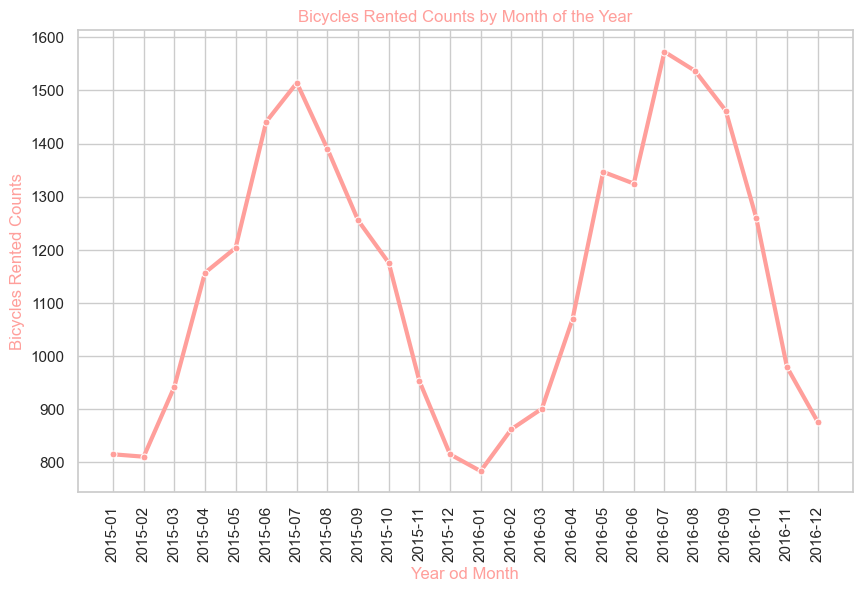

In [68]:
sns.set(style="whitegrid", palette="pastel")
plt.figure(figsize=(10, 6))
sns.lineplot(data=df.query("year != 2017"), x='year_of_month', y='cnt', ci=False, lw=3, marker = "o", markersize="5", color="r")
plt.xlabel('Year od Month', color = "r")
plt.ylabel('Bicycles Rented Counts', color= "r")
plt.title('Bicycles Rented Counts by Month of the Year', color= "r")
plt.xticks(rotation=90)
plt.show()

<div class="alert alert-warning alert-info">
    
## <span style=" color:red">Plot bike shares by hours on (holidays, weekend, season).
</span>
    

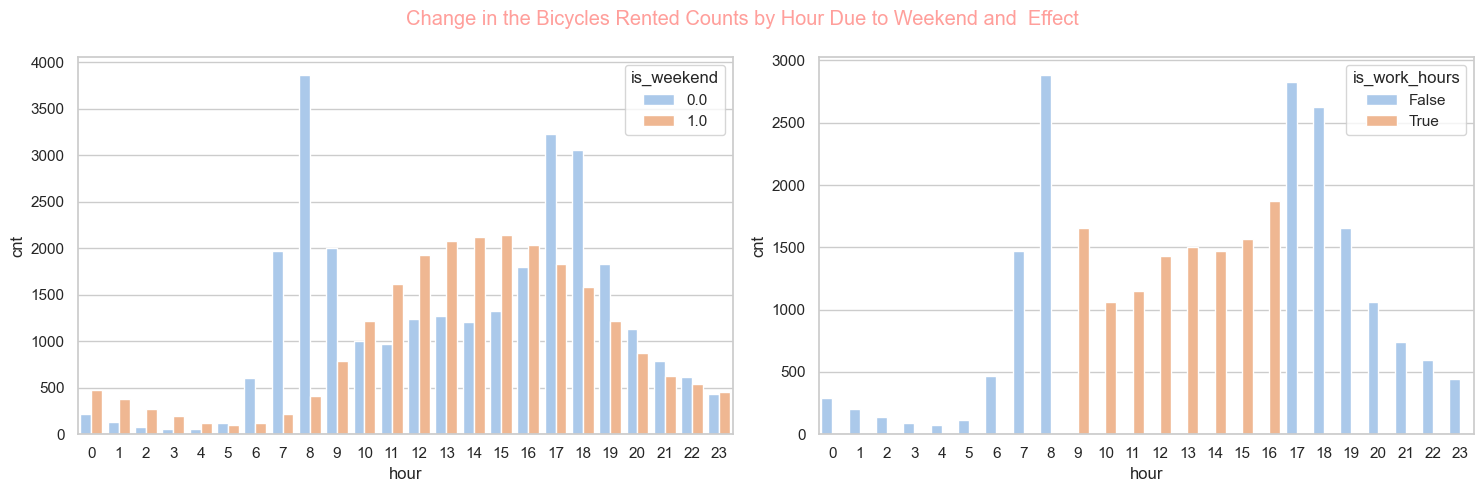

In [64]:
%matplotlib inline
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize =  (15, 5))
ax[0]= sns.barplot(data= df, x ="hour", y="cnt",hue = "is_weekend",  ax = ax[0], ci=False)
ax[1]= sns.barplot(data= df, x ="hour",y="cnt" ,hue = "is_work_hours", ax = ax[1], ci=False)
plt.suptitle("Change in the Bicycles Rented Counts by Hours Due to Weekend and Work Hours Effect", color="r")
plt.tight_layout();

<div class="alert alert-warning alert-info">
    
## <span style=" color:red"> Plot bike shares by day of week.
</span>

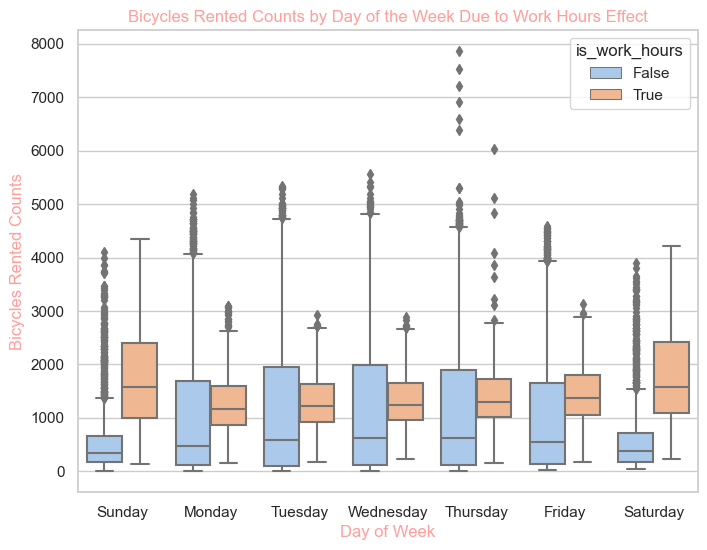

In [21]:
ax = sns.boxplot(x = "day_of_week", y = "cnt", hue= "is_work_hours",data = df)
plt.xlabel('Day of Week', color = "r")
plt.ylabel('Bicycles Rented Counts', color= "r")
plt.title('Bicycles Rented Counts by Day of the Week Due to Work Hours Effect', color= "r");

In [18]:
days = {
             0 : "Monday",
             1 : "Tuesday",
             2 : "Wednesday",
             3 : "Thursday",
             4 : "Friday", 
             5 : "Saturday", 
             6 : "Sunday"
            }
df["day_of_week"] = df['day_of_week'].map(days)

<Figure size 800x600 with 0 Axes>

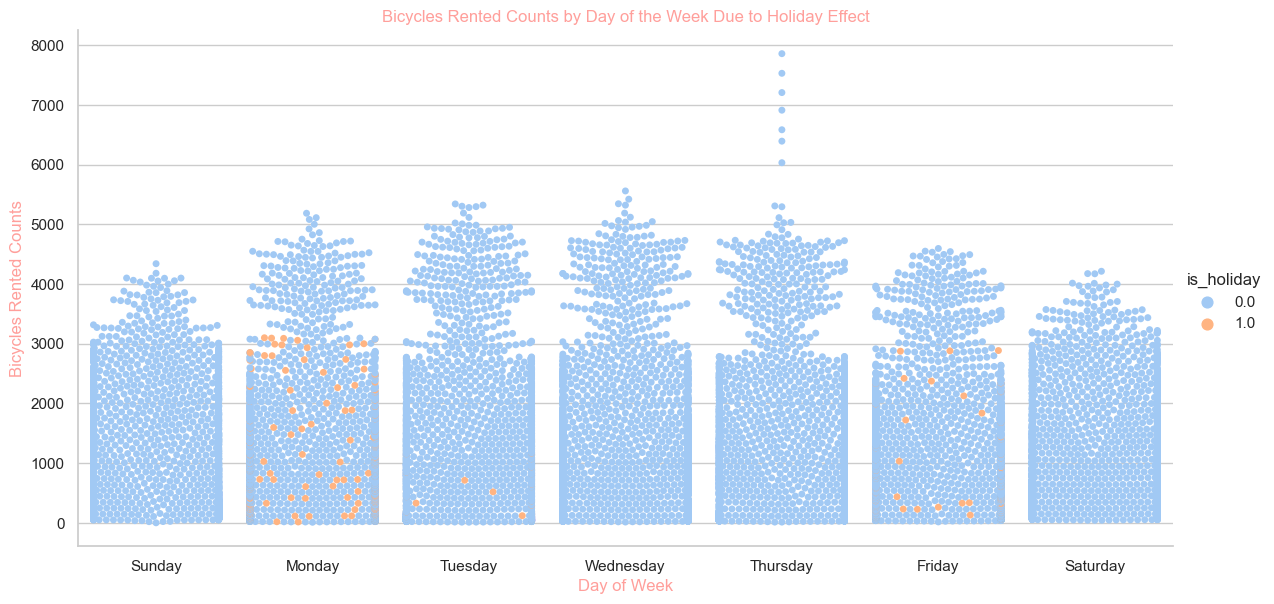

In [19]:
plt.figure(dpi=100)
ax = sns.catplot(data=df, x="day_of_week", y="cnt", hue= "is_holiday",kind="swarm", height=6, aspect=2)
plt.xlabel('Day of Week', color = "r")
plt.ylabel('Bicycles Rented Counts', color= "r")
plt.title('Bicycles Rented Counts by Day of the Week Due to Holiday Effect', color= "r");

<Figure size 1200x600 with 0 Axes>

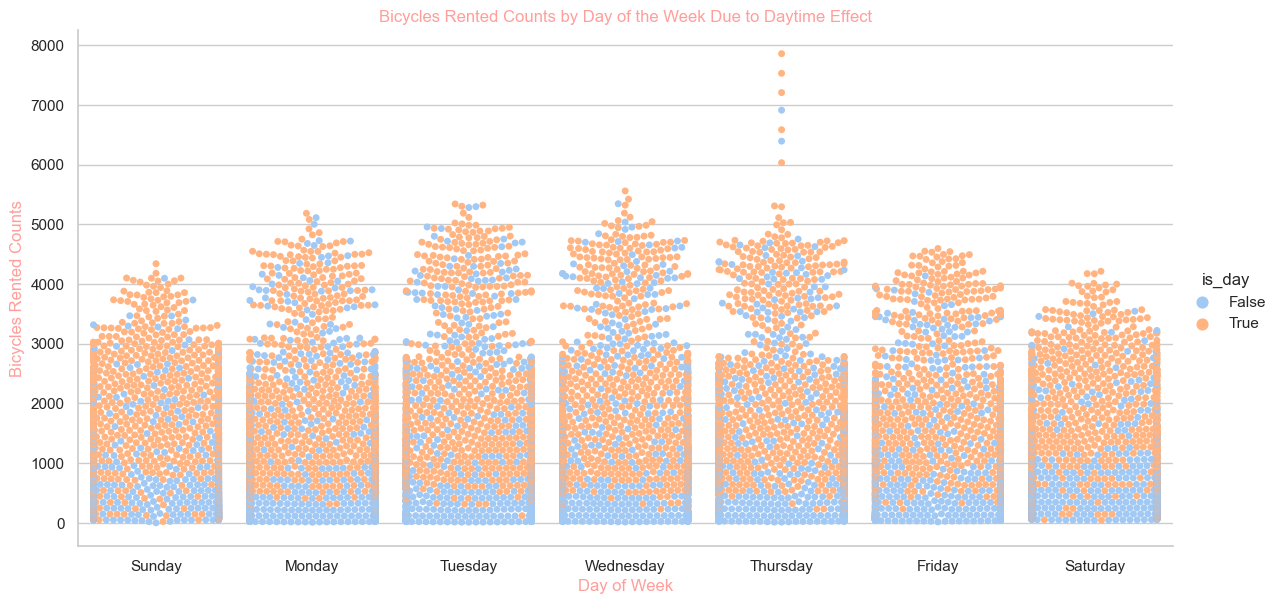

In [20]:
plt.figure(figsize=(12, 6))
g = sns.catplot(data=df, x="day_of_week", y="cnt", hue='is_day',kind="swarm", height=6, aspect=2)
plt.xlabel('Day of Week', color = "r")
plt.ylabel('Bicycles Rented Counts', color= "r")
plt.title('Bicycles Rented Counts by Day of the Week Due to Daytime Effect', color= "r");

<div class="alert alert-warning alert-info">
    
## <span style=" color:red"> Plot bike shares by year
</span>

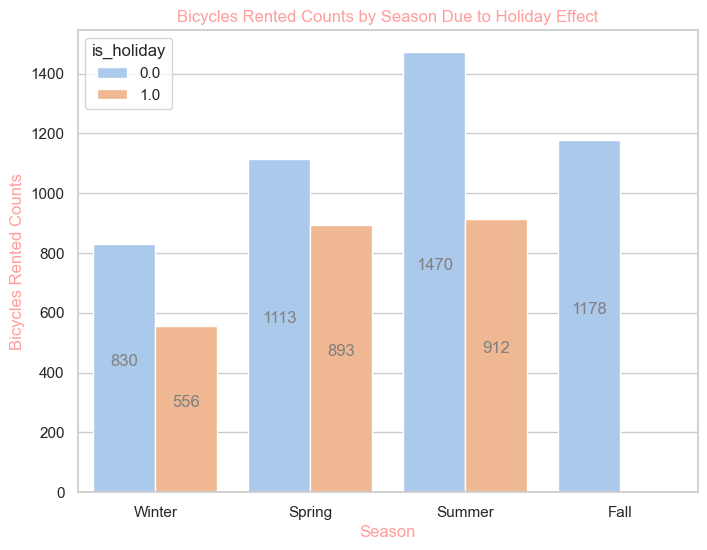

In [85]:
ax = sns.barplot(data=df, x="season", y="cnt", hue="is_holiday",palette="pastel", edgecolor="1", ci=False)
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='center', fontsize=12, color='grey', padding=5)
plt.xlabel('Season', color = "r")
plt.ylabel('Bicycles Rented Counts', color= "r")
plt.title('Bicycles Rented Counts by Season Due to Holiday Effect', color= "r");

<div class="alert alert-warning alert-info">
    
## <span style=" color:red">Visualize the distribution of bike shares by weekday/weekend with piechart and barplot
</span>

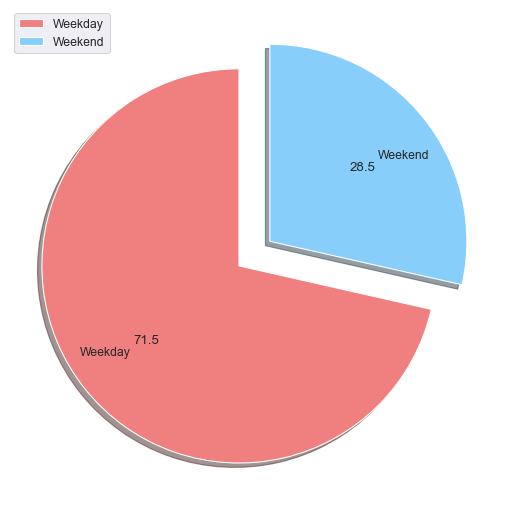

In [69]:
%matplotlib inline

plt.figure(dpi=80,figsize=(10, 8))

color_list= ["lightcoral", "lightskyblue"]
explode_list = [0.1, 0.1]

mylabels = ["Weekday", "Weekend"]
pie_weekdays = df["is_weekend"].value_counts()
plt.pie(pie_weekdays, labels = mylabels, 
        labeldistance = 0.7, 
        autopct = "%.1f", 
        startangle = 90, 
        shadow = True, 
        pctdistance = 0.6,
       colors = color_list,
       explode = explode_list)

plt.legend(loc = (0))
plt.show()

<div class="alert alert-warning alert-info">
<span style=" color:red">Plot the distribution of weather code by seasons
</span>

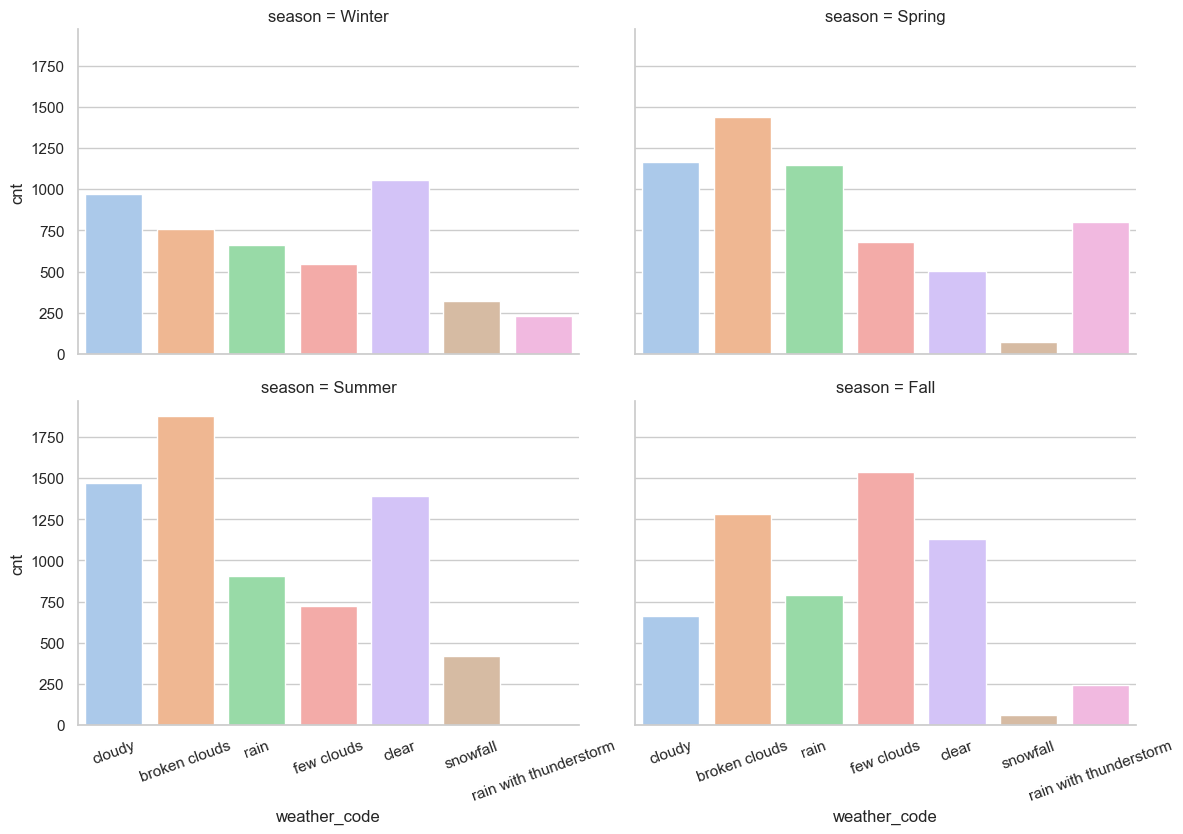

In [67]:
g = sns.FacetGrid(data=df, col='season', col_wrap=2, height=4, aspect=1.5)
g.map(sns.barplot, 'weather_code', 'cnt', palette='pastel', ci=None)
for ax in g.axes.flat:
    ax.set_xticklabels(ax.get_xticklabels(), rotation=20)
plt.show()

----------------

----------------

<div class="alert alert-block alert-info alert">

# <span style=" color:red">Conclusion Graphs

Average Least Bike Rented Season: Winter 
Average Most Bike Rented Season: Summer


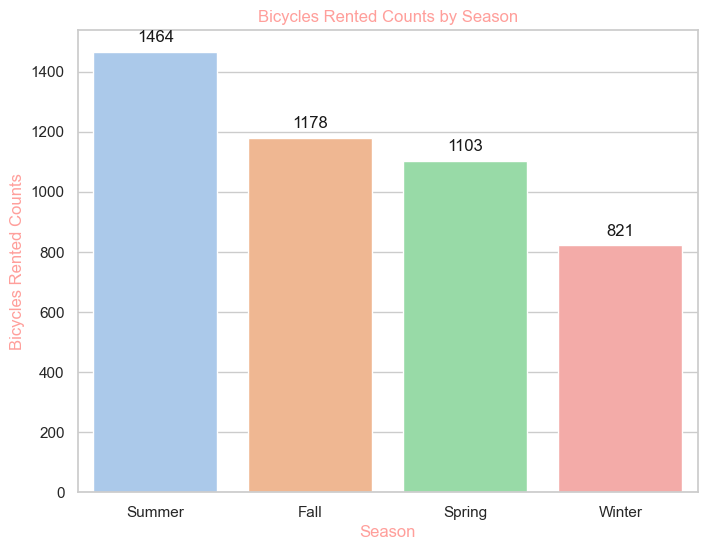

In [90]:
seasong= df.groupby("season")["cnt"].mean().reset_index().sort_values(by='cnt', ascending=False)
s_min_effect = seasong[-1:]
s_min = s_min_effect['season'].values[0]
s_max_effect = seasong[0:]
s_max = s_max_effect['season'].values[0]
print("Average Least Bike Rented Season:", s_min, "\nAverage Most Bike Rented Season:", s_max)

ax = sns.barplot(x="season", y="cnt", data=seasong, ci=None)
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', fontsize=12, color='k', padding=5)
plt.xlabel("Season", color = "r")
plt.ylabel('Bicycles Rented Counts', color= "r")
plt.title('Bicycles Rented Counts by Season', color= "r");

Average Minimum Bike Rented Month: 1 .Month of Year
Average Maximum Bike Rented Month: 7 .Month of Year


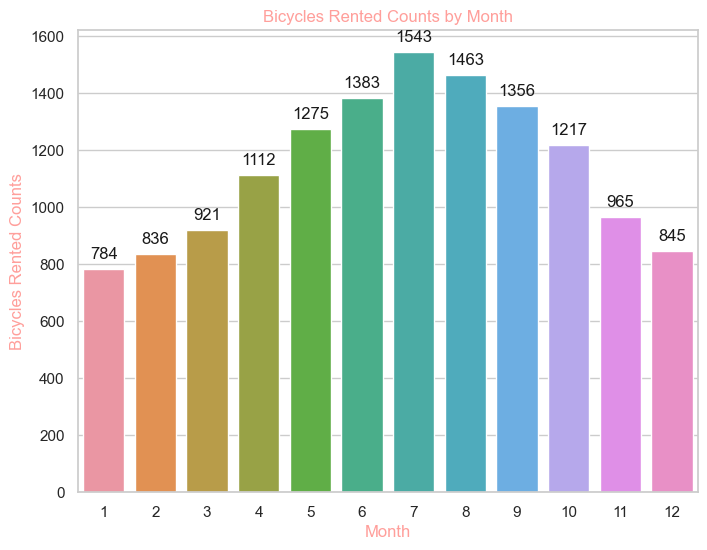

In [89]:
monthg = df.groupby("month")["cnt"].mean().reset_index().sort_values(by='cnt', ascending=False)
m_min_effect = monthg[-1:]
m_min = m_min_effect['month'].values[0]
m_max_effect = monthg[0:]
m_max = m_max_effect['month'].values[0]

print("Average Minimum Bike Rented Month:", m_min,".Month of Year\nAverage Maximum Bike Rented Month:", m_max,".Month of Year" )

ax = sns.barplot(x="month", y="cnt", data=monthg, ci=None)
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', fontsize=12, color='k', padding=5)
plt.xlabel("Month", color="r")
plt.ylabel('Bicycles Rented Counts', color= "r")
plt.title('Bicycles Rented Counts by Month', color= "r");

Average 2.Minimum Bike Rented Day of the Month: 24 . day of month
Average Maximum Bike Rented Day of the Month: 9 . day of month


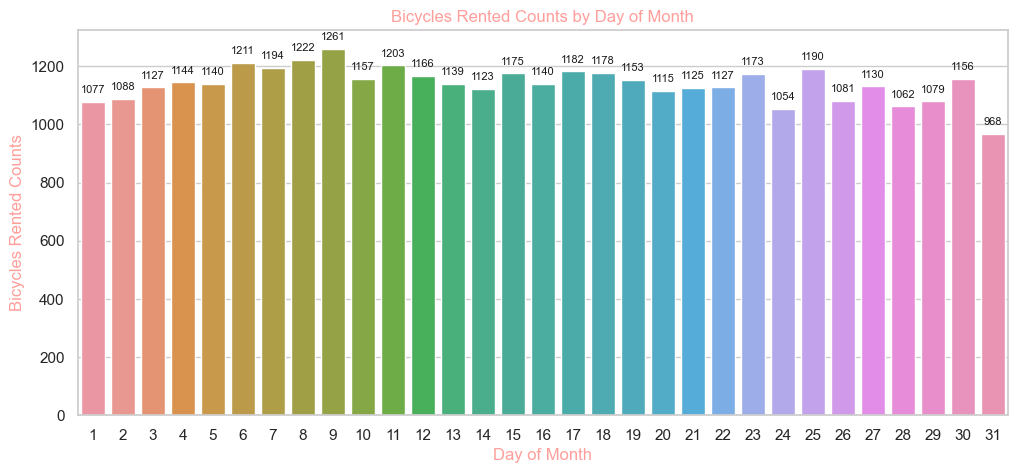

In [92]:
plt.figure(figsize=(12, 5))
dmonthg = df.groupby("day_of_month")["cnt"].mean().reset_index().sort_values(by='cnt', ascending=False)
dm_min_effect = dmonthg[-2:]
dm_min = dm_min_effect['day_of_month'].values[0]
dm_max_effect = dmonthg[0:]
dm_max = dm_max_effect['day_of_month'].values[0]
print("Average 2.Minimum Bike Rented Day of the Month:", dm_min, ". day of month\nAverage Maximum Bike Rented Day of the Month:", dm_max,". day of month")

ax=sns.barplot(x="day_of_month", y="cnt", data=dmonthg, ci=None)
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', fontsize=8, color='k', padding=5)
plt.xlabel("Day of Month", color="r")
plt.ylabel('Bicycles Rented Counts', color= "r")
plt.title('Bicycles Rented Counts by Day of Month', color= "r");

Average Minimum  Bike Rented Day of the Week: Sunday 
Average Maximum Bike Rented Day of the Week: Thursday


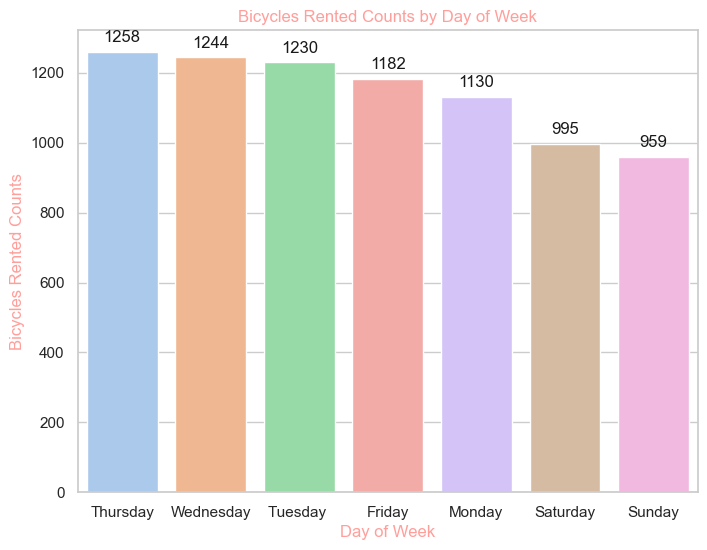

In [86]:
dayg = df.groupby("day_of_week")["cnt"].mean().reset_index().sort_values(by='cnt', ascending=False)

dmin_effect = dayg[-1:]
dmin = dmin_effect['day_of_week'].values[0]

dmax_effect = dayg[0:]
dmax = dmax_effect['day_of_week'].values[0]

print("Average Minimum  Bike Rented Day of the Week:", dmin,"\nAverage Maximum Bike Rented Day of the Week:", dmax )

ax = sns.barplot(x="day_of_week", y="cnt", data=dayg, ci=None)
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', fontsize=12, color='k', padding=5)
plt.xlabel("Day of Week", color="r")
plt.ylabel('Bicycles Rented Counts', color= "r")
plt.title('Bicycles Rented Counts by Day of Week', color= "r");

Average Least Bike Rented Weather: snowfall 
Average Most Bike Rented Weather: few clouds


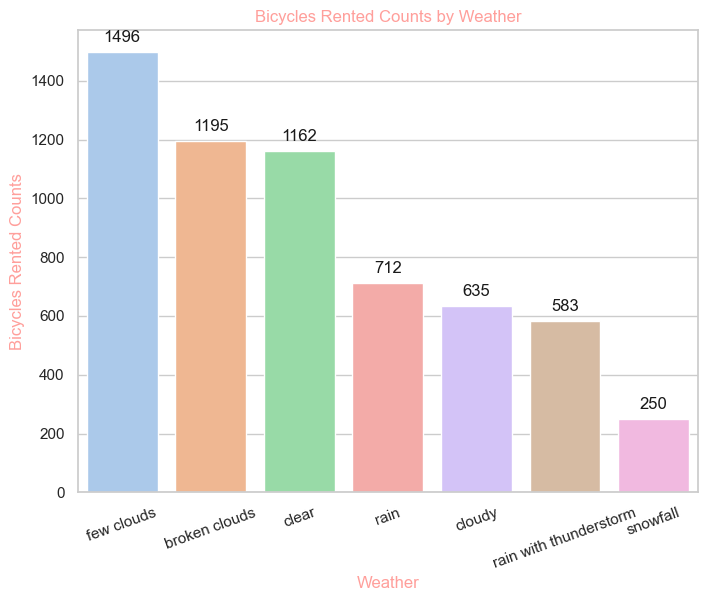

In [85]:
weatherg = df.groupby("weather_code")["cnt"].mean().reset_index().sort_values(by='cnt', ascending=False)

min_effect = weatherg[-1:]
min_weather_code = min_effect['weather_code'].values[0]

max_effect = weather_with_min_rentals[0:]
max_weather_code = max_effect['weather_code'].values[0]


print("Average Least Bike Rented Weather:", min_weather_code,"\nAverage Most Bike Rented Weather:", max_weather_code )

ax= sns.barplot(x="weather_code",y="cnt",data=weatherg)
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', fontsize=12, color='k', padding=5)
plt.xlabel("Weather", color="r")
plt.ylabel('Bicycles Rented Counts', color= "r")
plt.title('Bicycles Rented Counts by Weather', color= "r")
plt.xticks(rotation=20);

In [98]:
"""
sns.displot(data=df, x="cnt",
           col = "day_of_week",
           row = "season",
           hue ="weather_code");
"""